# Problem Statement
* A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.

* Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

### Importing Initial Libraries

In [109]:
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages

### Data Preparation and Pre-processing

In [110]:
df = pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [111]:
# Check duplication percentage:
(df.duplicated().sum()/df.shape[0])*100

0.0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [113]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

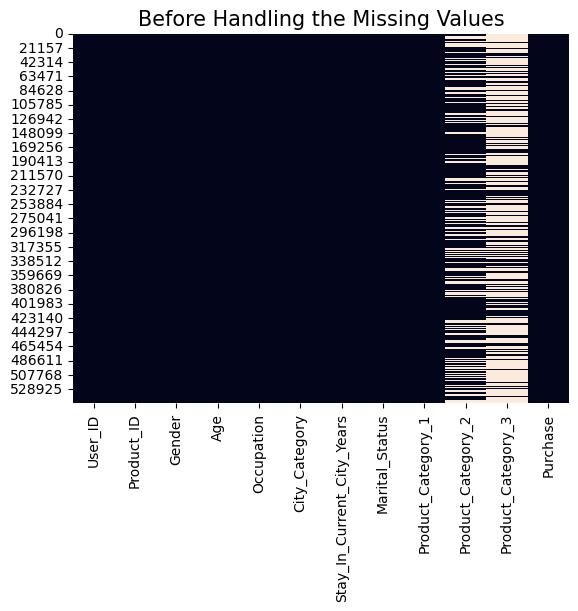

In [114]:
sns.heatmap(df.isnull(), cbar = False)
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [115]:
df.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [116]:
#By reviewing our data, we found that those missing values are cells that were left empty on purpose,
#because they represent cases in which the product didn't belong to either both or one of the other product 
#categories (Product_Category_2 or Product_Category_2) which is the majority cases.
#So, we're going to fill them with the value of zero (0).

df.fillna(0, inplace = True)

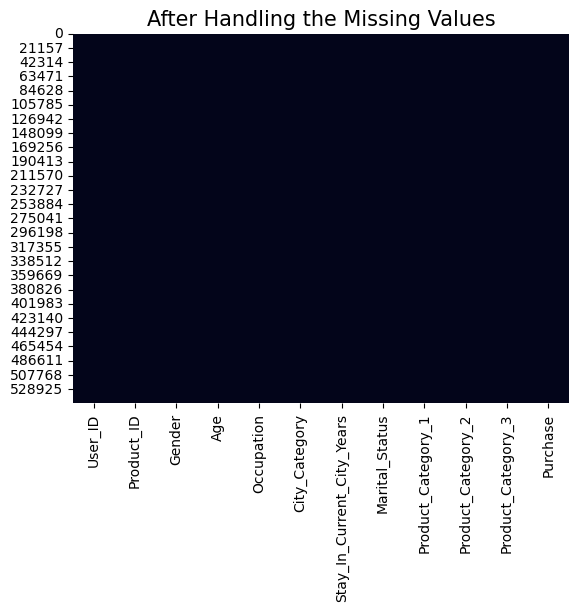

In [117]:
sns.heatmap(df.isnull(), cbar = False)
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

### EDA

In [118]:
df.drop("User_ID", axis = 1).describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


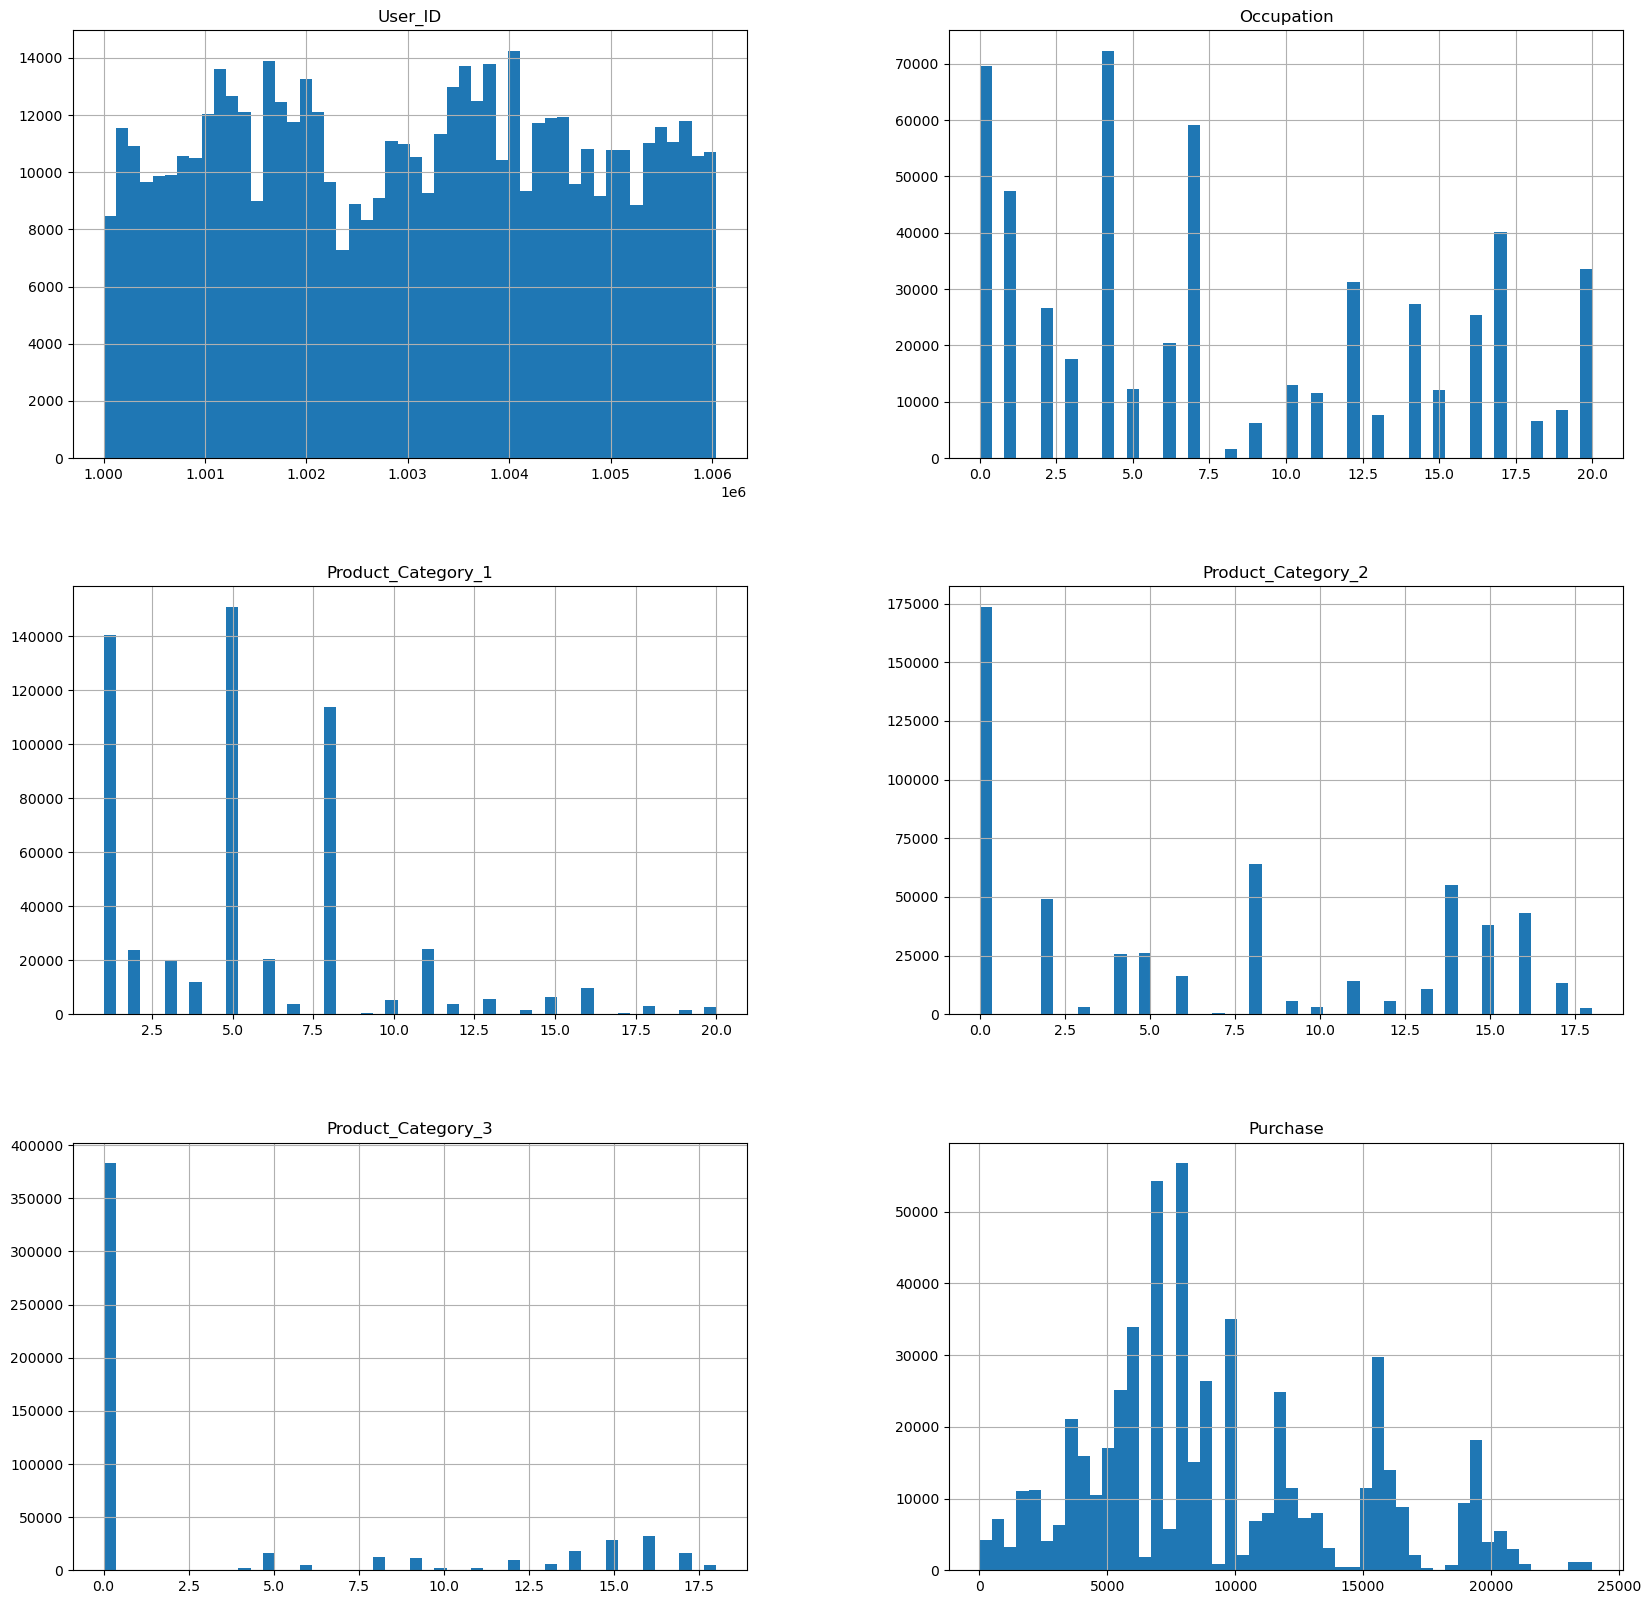

In [119]:
# Overall (total) distribution:
df.drop(columns = "Marital_Status").hist(bins = 50 , figsize= (20,20))
plt.show()

array([<Axes: ylabel='Density'>], dtype=object)

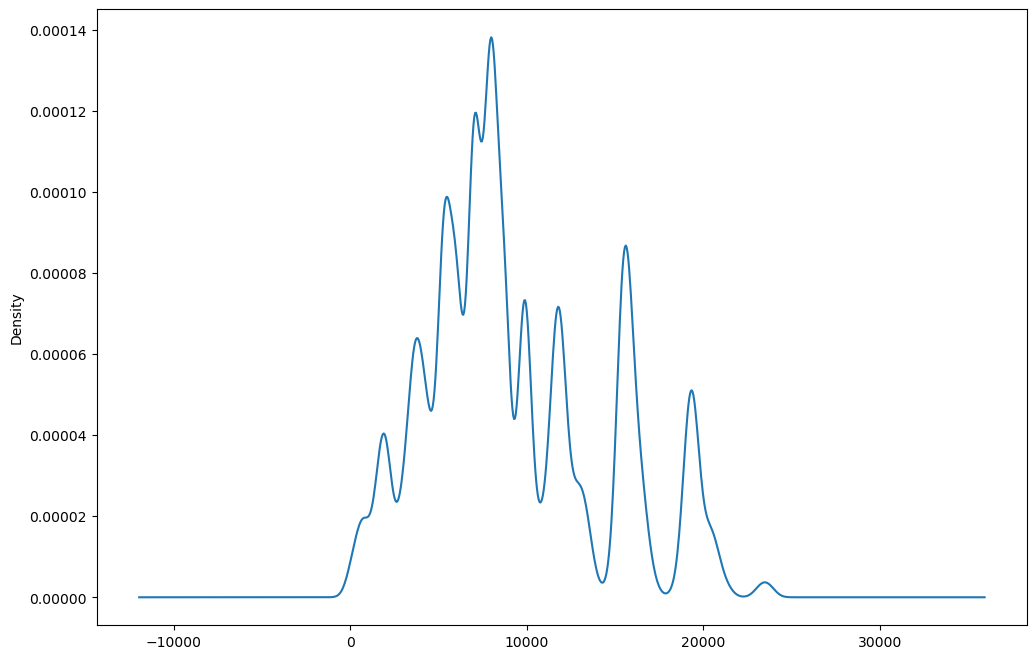

In [120]:
df["Purchase"].plot(kind = "density", subplots = True,  figsize = (12,8))

In [121]:
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

User_ID                  Axes(0.125,0.11;0.0945122x0.77)
Occupation            Axes(0.238415,0.11;0.0945122x0.77)
Marital_Status        Axes(0.351829,0.11;0.0945122x0.77)
Product_Category_1    Axes(0.465244,0.11;0.0945122x0.77)
Product_Category_2    Axes(0.578659,0.11;0.0945122x0.77)
Product_Category_3    Axes(0.692073,0.11;0.0945122x0.77)
Purchase              Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

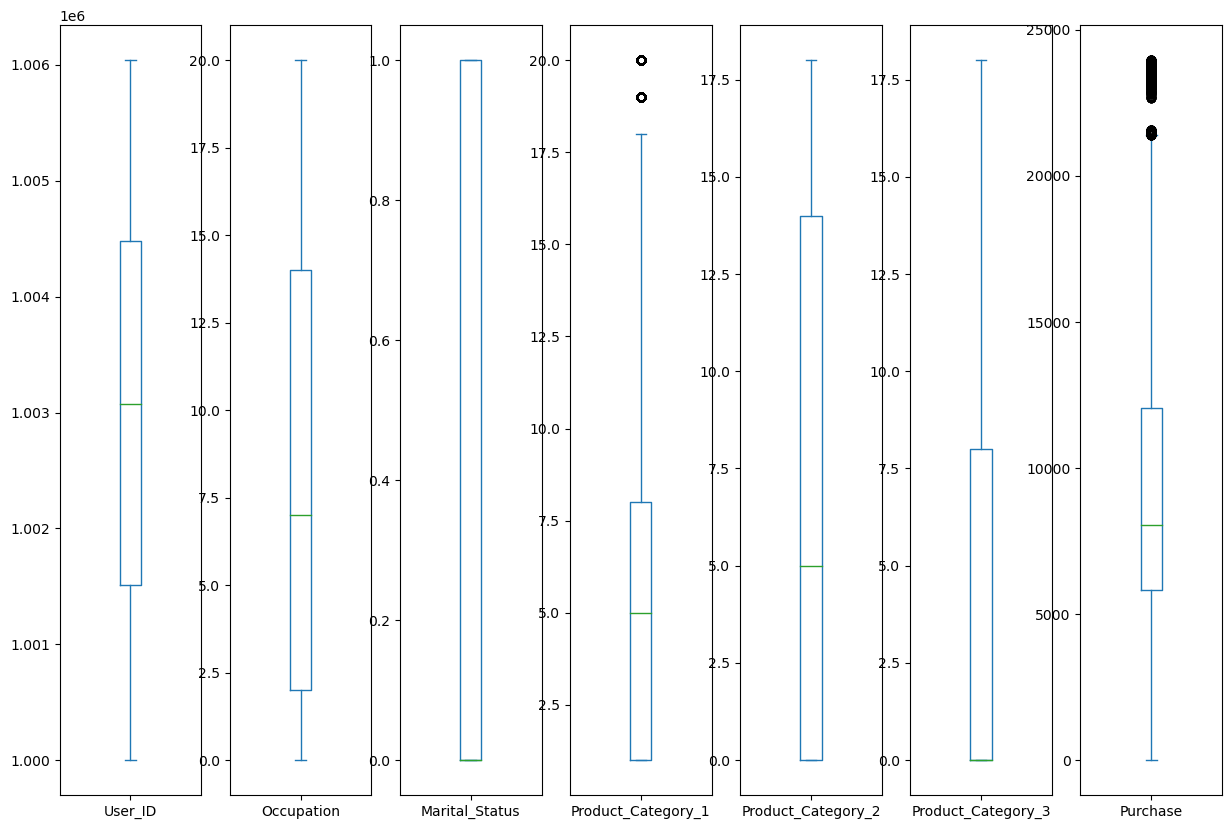

In [122]:
df.plot(kind = "box", figsize = (15,10), subplots = True)

<Axes: xlabel='Purchase'>

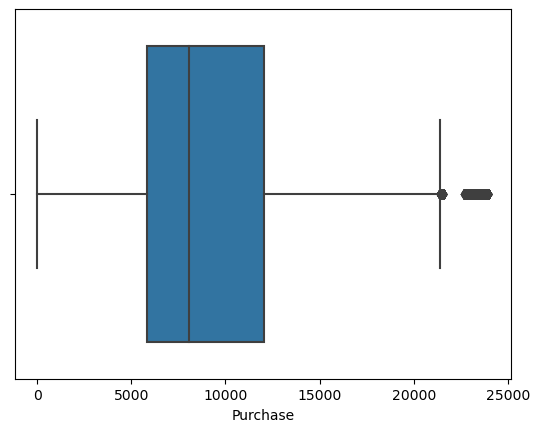

In [123]:
# Let's visualize those outliers
sns.boxplot(x = df["Purchase"])

In [124]:
(df[df['Purchase']>20000].shape[0] / df.shape[0]) * 100

2.3071692954325647

<Axes: xlabel='Product_Category_1'>

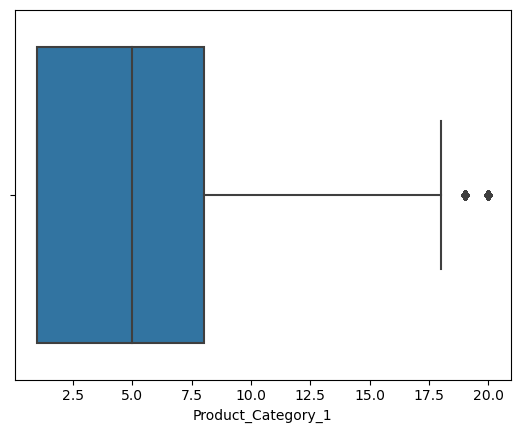

In [125]:
sns.boxplot(x = df["Product_Category_1"])

In [126]:
(df[df['Product_Category_1']>17.5].shape[0] / df.shape[0]) * 100

1.3231091428696087

#### Q1: How many products do we have?

In [127]:
df["Product_ID"].unique().shape[0]

3631

#### Q2: How does gender affect the purchases?

In [128]:
gender_p = df.groupby('Gender')["Purchase"].sum()

In [129]:
gender_p = pd.DataFrame(gender_p)
gender_p

,Purchase
Gender,
F,1186232642
M,3909580100


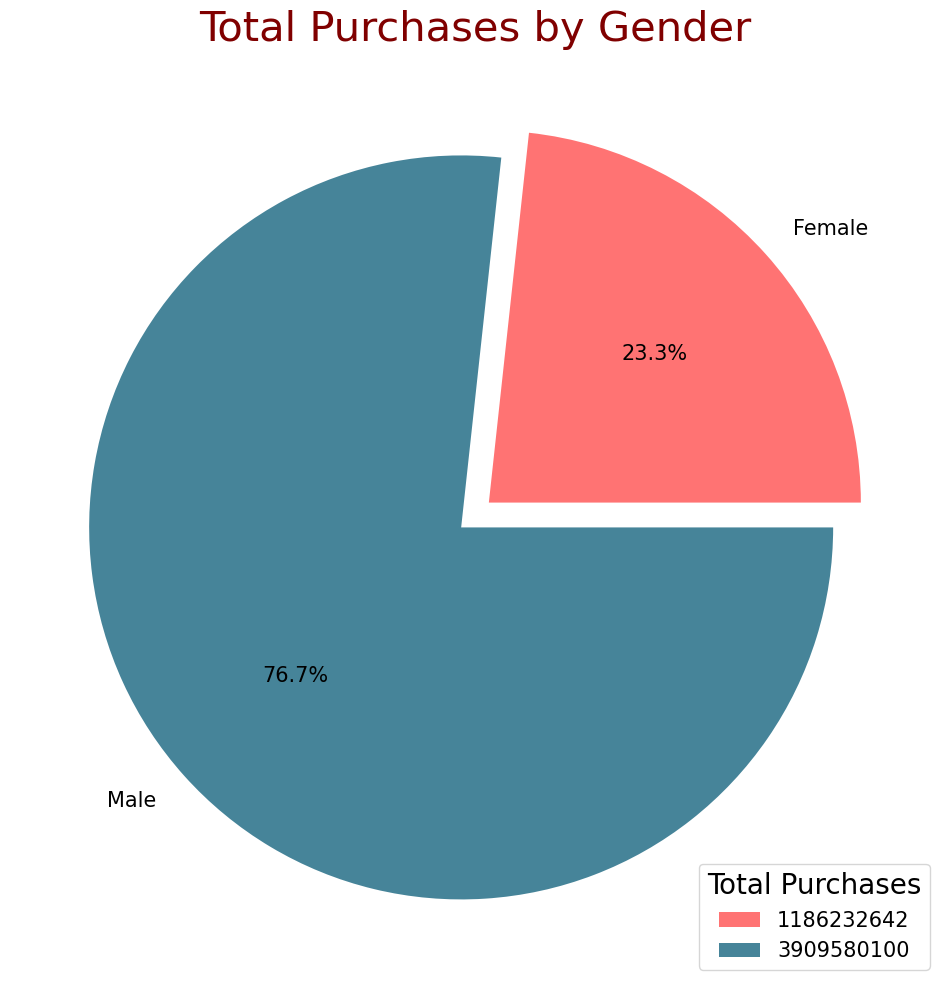

In [130]:
labels = ["Female", "Male"]
sizes = gender_p["Purchase"]
colors = ['#ff7373', '#468499']
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Total Purchases by Gender', color = 'Maroon',fontsize = 30)
plt.legend(gender_p["Purchase"], loc = 'lower right', title = 'Total Purchases',title_fontsize = "20",
           fontsize = "15")
plt.show()

In [ ]:
# We can see that the majority of the purchases that have been done is by the males.

#### Q3: How does age affect the purchases?

In [131]:
Age_p = df.groupby('Age')["Purchase"].sum()
Age_p = pd.DataFrame(Age_p)
Age_p

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


In [ ]:
Age_p["Purchase"].keys()

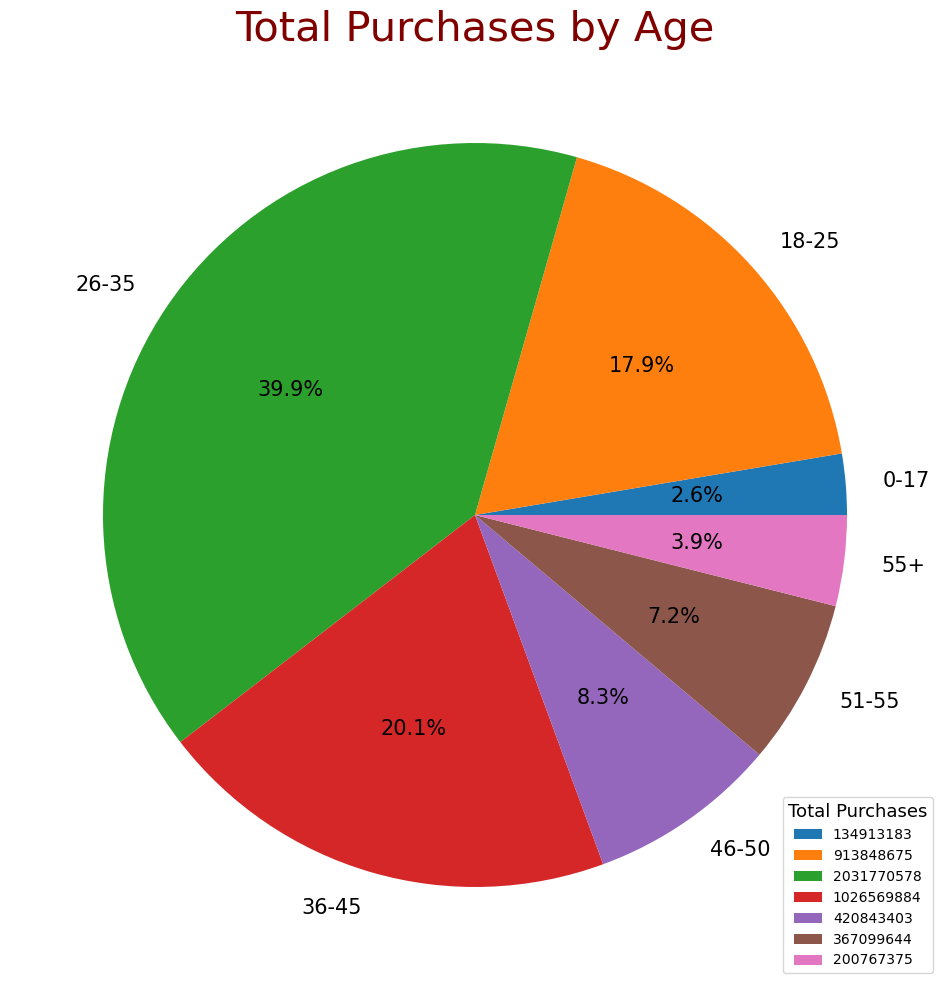

In [133]:
labels = Age_p["Purchase"].keys()
sizes = Age_p["Purchase"]
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"})
plt.title('Total Purchases by Age',color = 'Maroon',fontsize = 30)
plt.legend(Age_p["Purchase"], loc = 'lower right', title = 'Total Purchases', 
           title_fontsize = "13", fontsize = "10")
plt.show()

In [ ]:
# We can see that the majority are for people aging between 18-45 years old, with young adults between 26-35
# being the most buyers with about 40% of total purchases.

#### Q4: What is the relationship between the occupation and the purchases?

In [134]:
Occ_p = df.groupby('Occupation')["Purchase"].sum()

In [135]:
Occ_p = pd.DataFrame(Occ_p)
Occ_p.reset_index(inplace = True)

In [136]:
Occ_P_sort = Occ_p.sort_values("Purchase",  ascending = False)

In [137]:
Occ_P_sort = pd.DataFrame(Occ_P_sort)

In [138]:
Occ_P_sort.reset_index(inplace = True)

In [139]:
Occ_P_sort["Occupation"] = Occ_P_sort["Occupation"].astype(str)

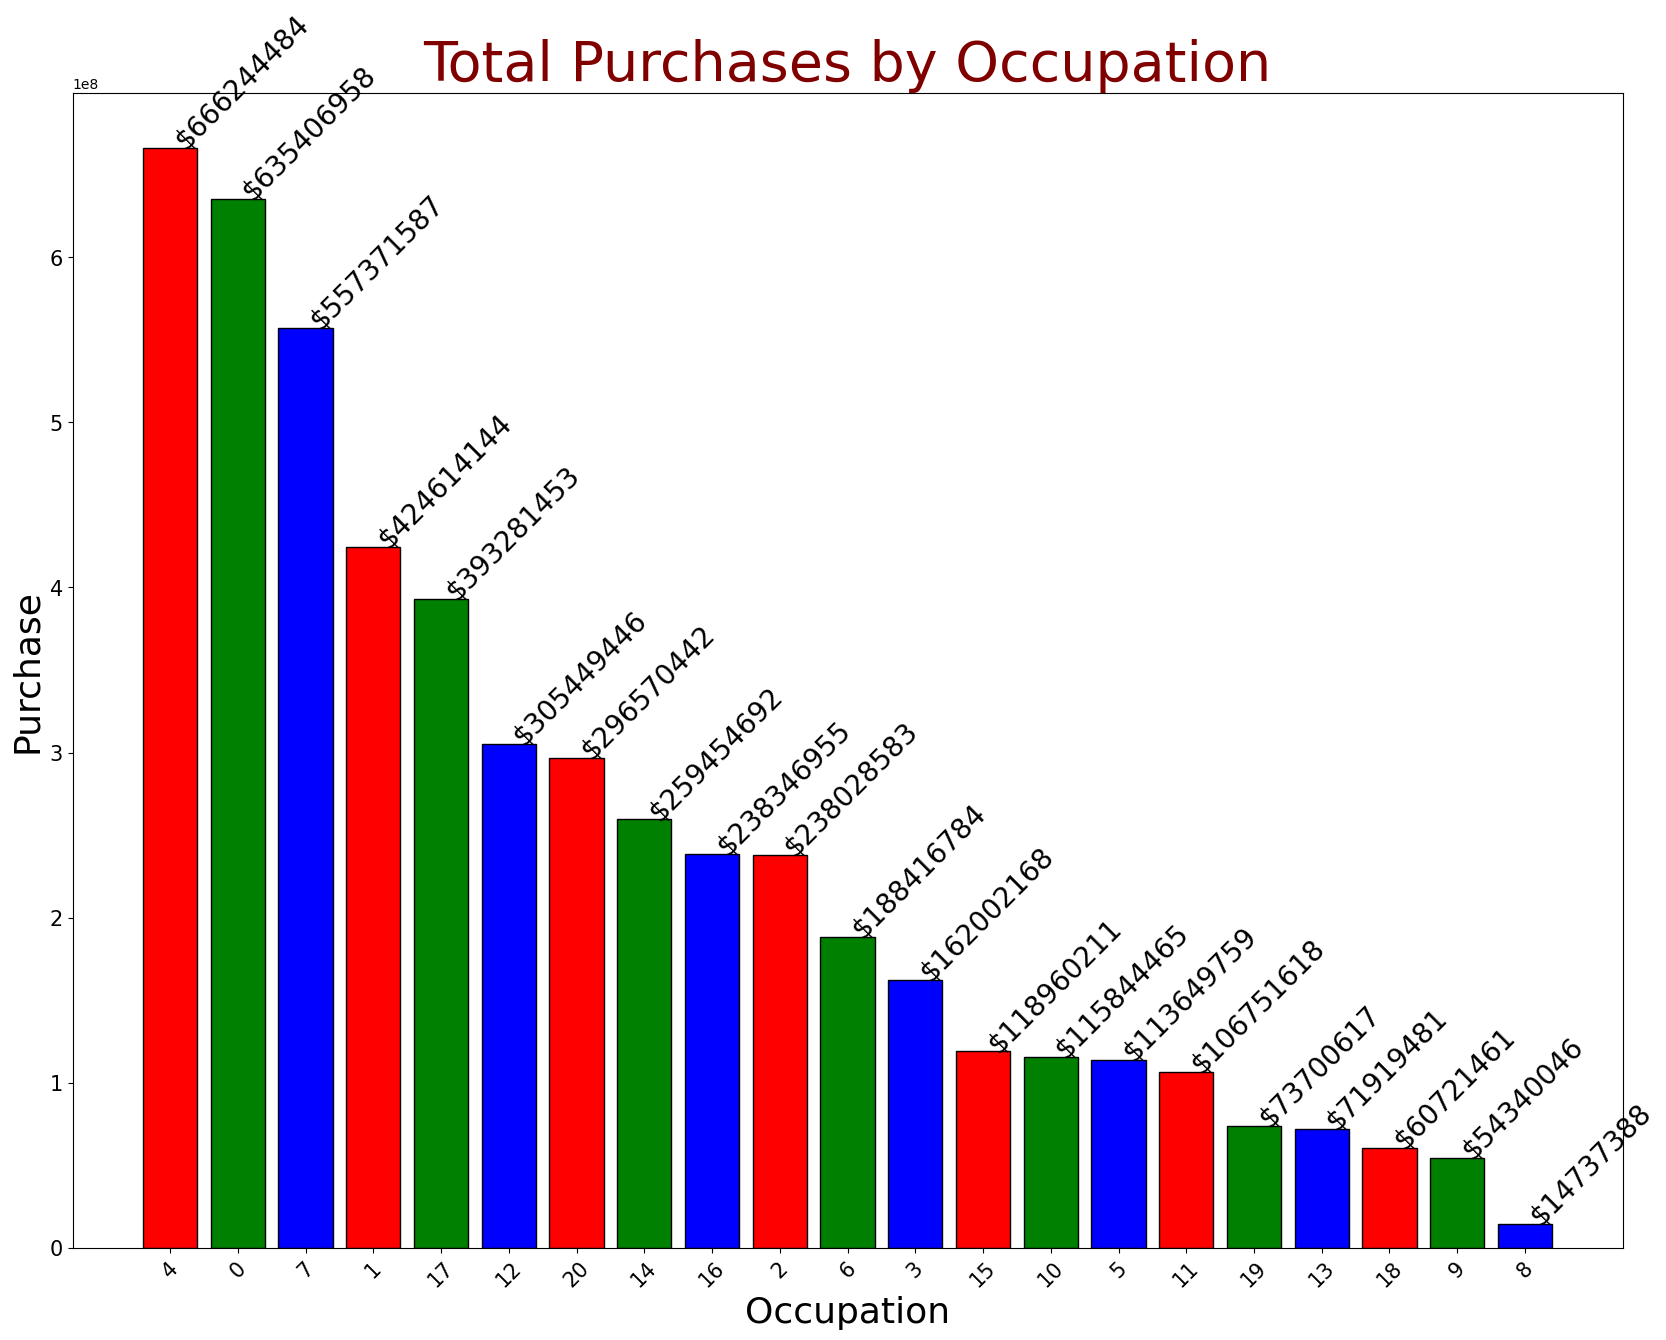

In [140]:
plt.figure(figsize = (20,15)) 
plt.bar(Occ_P_sort["Occupation"], Occ_P_sort["Purchase"],
        color= ('red', "green", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Occupation",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Total Purchases by Occupation',color = 'Maroon',fontsize = 40)
for k,v in Occ_P_sort["Purchase"].items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

In [ ]:
# We noticed that the top 3 occupations with the most purchases are descendingly: 4, 0, then 7.

#### Q5: Does the city category has any impact on the purchases?

In [141]:
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [142]:
City_p = df.groupby('City_Category')["Purchase"].sum()
City_p = pd.DataFrame(City_p)
City_p

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


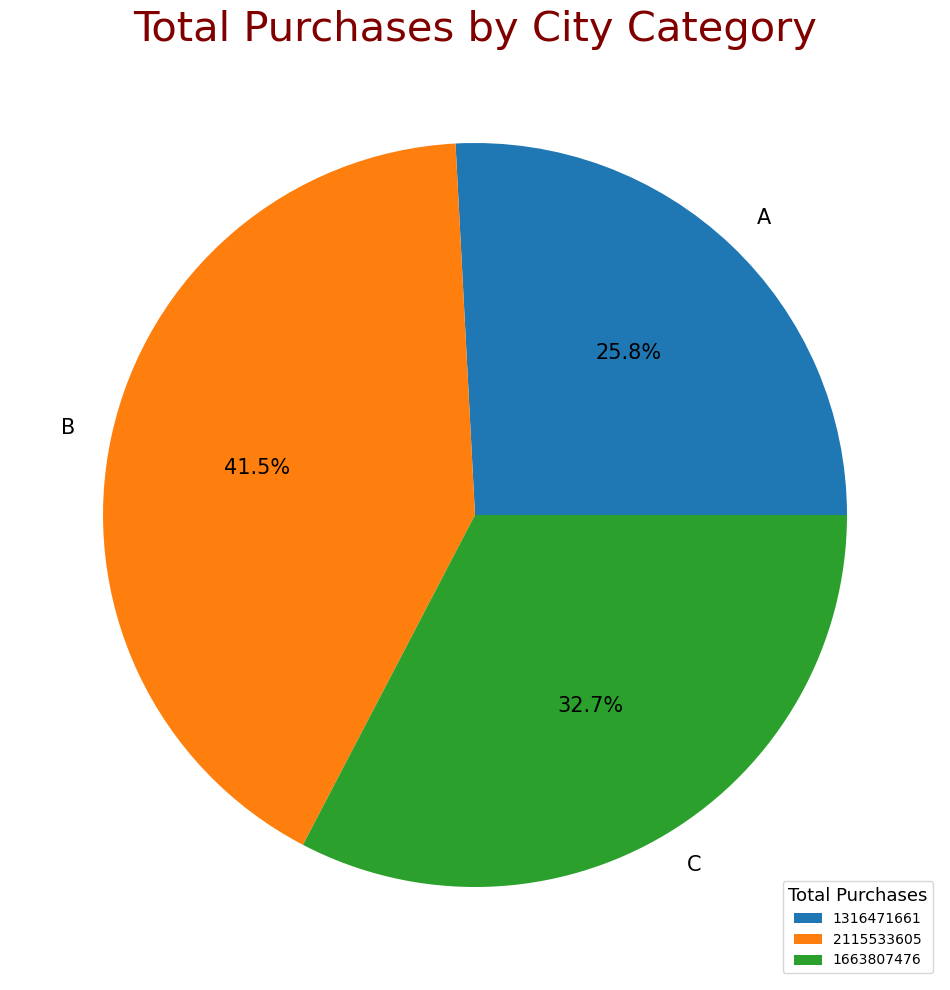

In [143]:
labels = City_p["Purchase"].keys()
sizes = City_p["Purchase"]
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"})
plt.title('Total Purchases by City Category',color = 'Maroon',fontsize = 30)
plt.legend(City_p["Purchase"], loc = 'lower right', title = 'Total Purchases', 
           title_fontsize = "13", fontsize = "10")
plt.show()

In [144]:
# We can see that the City Category "B has the most purchases with about 42%, but we can see that the margin isn't that great;
# as "C" comes next with about 33%.

#### Q6: How does the martial status impact the purchases?

In [145]:
d = df.copy()
d["Marital_Status"] = d["Marital_Status"].replace(0, "Single")
d["Marital_Status"] = d["Marital_Status"].replace(1, "Married")
Mar_p = d.groupby('Marital_Status')["Purchase"].sum()
Mar_p = pd.DataFrame(Mar_p)
Mar_p

,Purchase
Marital_Status,
Married,2086885295
Single,3008927447


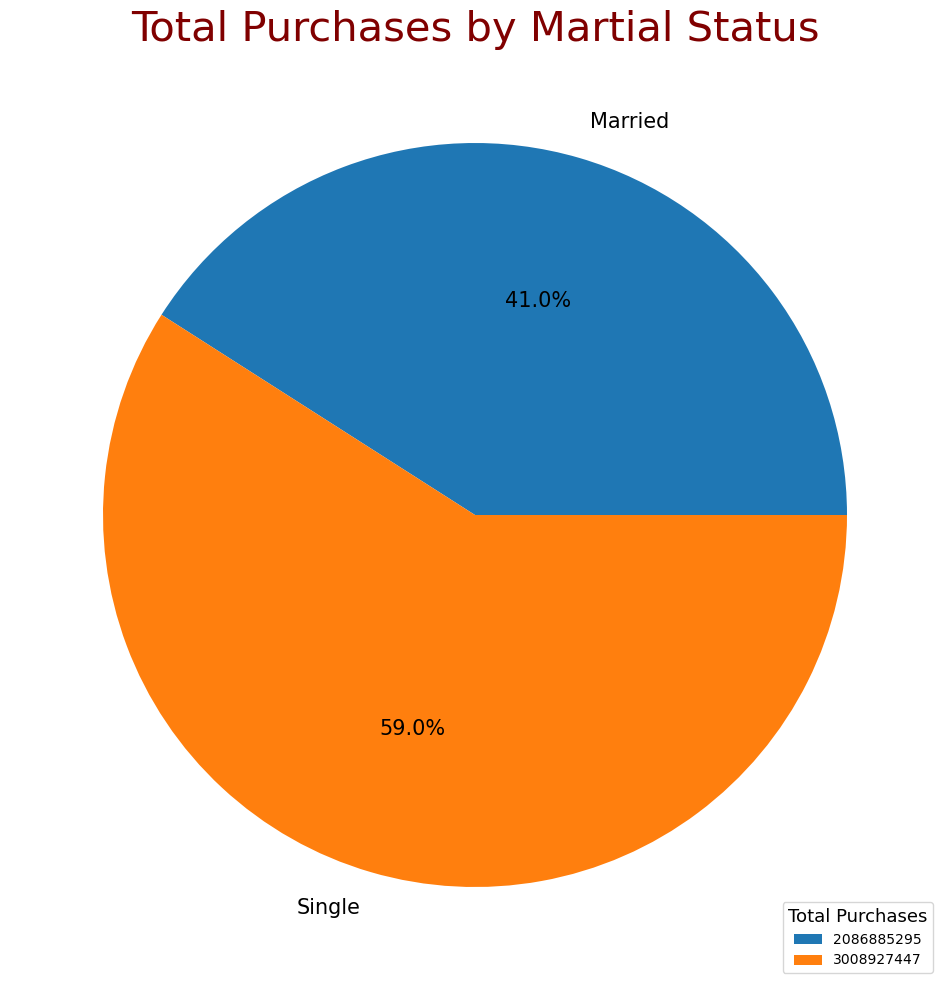

In [146]:
labels = Mar_p["Purchase"].keys()
sizes = Mar_p["Purchase"]
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"})
plt.title('Total Purchases by Martial Status',color = 'Maroon',fontsize = 30)
plt.legend(Mar_p["Purchase"], loc = 'lower right', title = 'Total Purchases', 
           title_fontsize = "13", fontsize = "10")
plt.show()

In [147]:
# We saw that singles have higher purchases rate than married ones with a percentage of about 60%.

#### Q7: What are the most categories buyers have purchased from?

In [148]:
df.keys()


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### For the 1st (and major) Product Category List:

In [149]:
pc1_p = df.groupby('Product_Category_1')["Purchase"].sum()
pc1_p = pd.DataFrame(pc1_p)
pc1_p.reset_index(inplace = True)
pc1_p

,Product_Category_1,Purchase
0,1,1910013754
1,2,268516186
2,3,204084713
3,4,27380488
4,5,941835229
5,6,324150302
6,7,60896731
7,8,854318799
8,9,6370324
9,10,100837301


In [150]:
pc1_p_sort = pc1_p.sort_values("Purchase",  ascending = False)
pc1_p_sort

,Product_Category_1,Purchase
0,1,1910013754
4,5,941835229
7,8,854318799
5,6,324150302
1,2,268516186
2,3,204084713
15,16,145120612
10,11,113791115
9,10,100837301
14,15,92969042


In [151]:
pc1_p_sort["Product_Category_1"] = pc1_p_sort["Product_Category_1"].astype(str)
pc1_p_sort.reset_index(inplace = True)
pc1_p_sort

,index,Product_Category_1,Purchase
0,0,1,1910013754
1,4,5,941835229
2,7,8,854318799
3,5,6,324150302
4,1,2,268516186
5,2,3,204084713
6,15,16,145120612
7,10,11,113791115
8,9,10,100837301
9,14,15,92969042


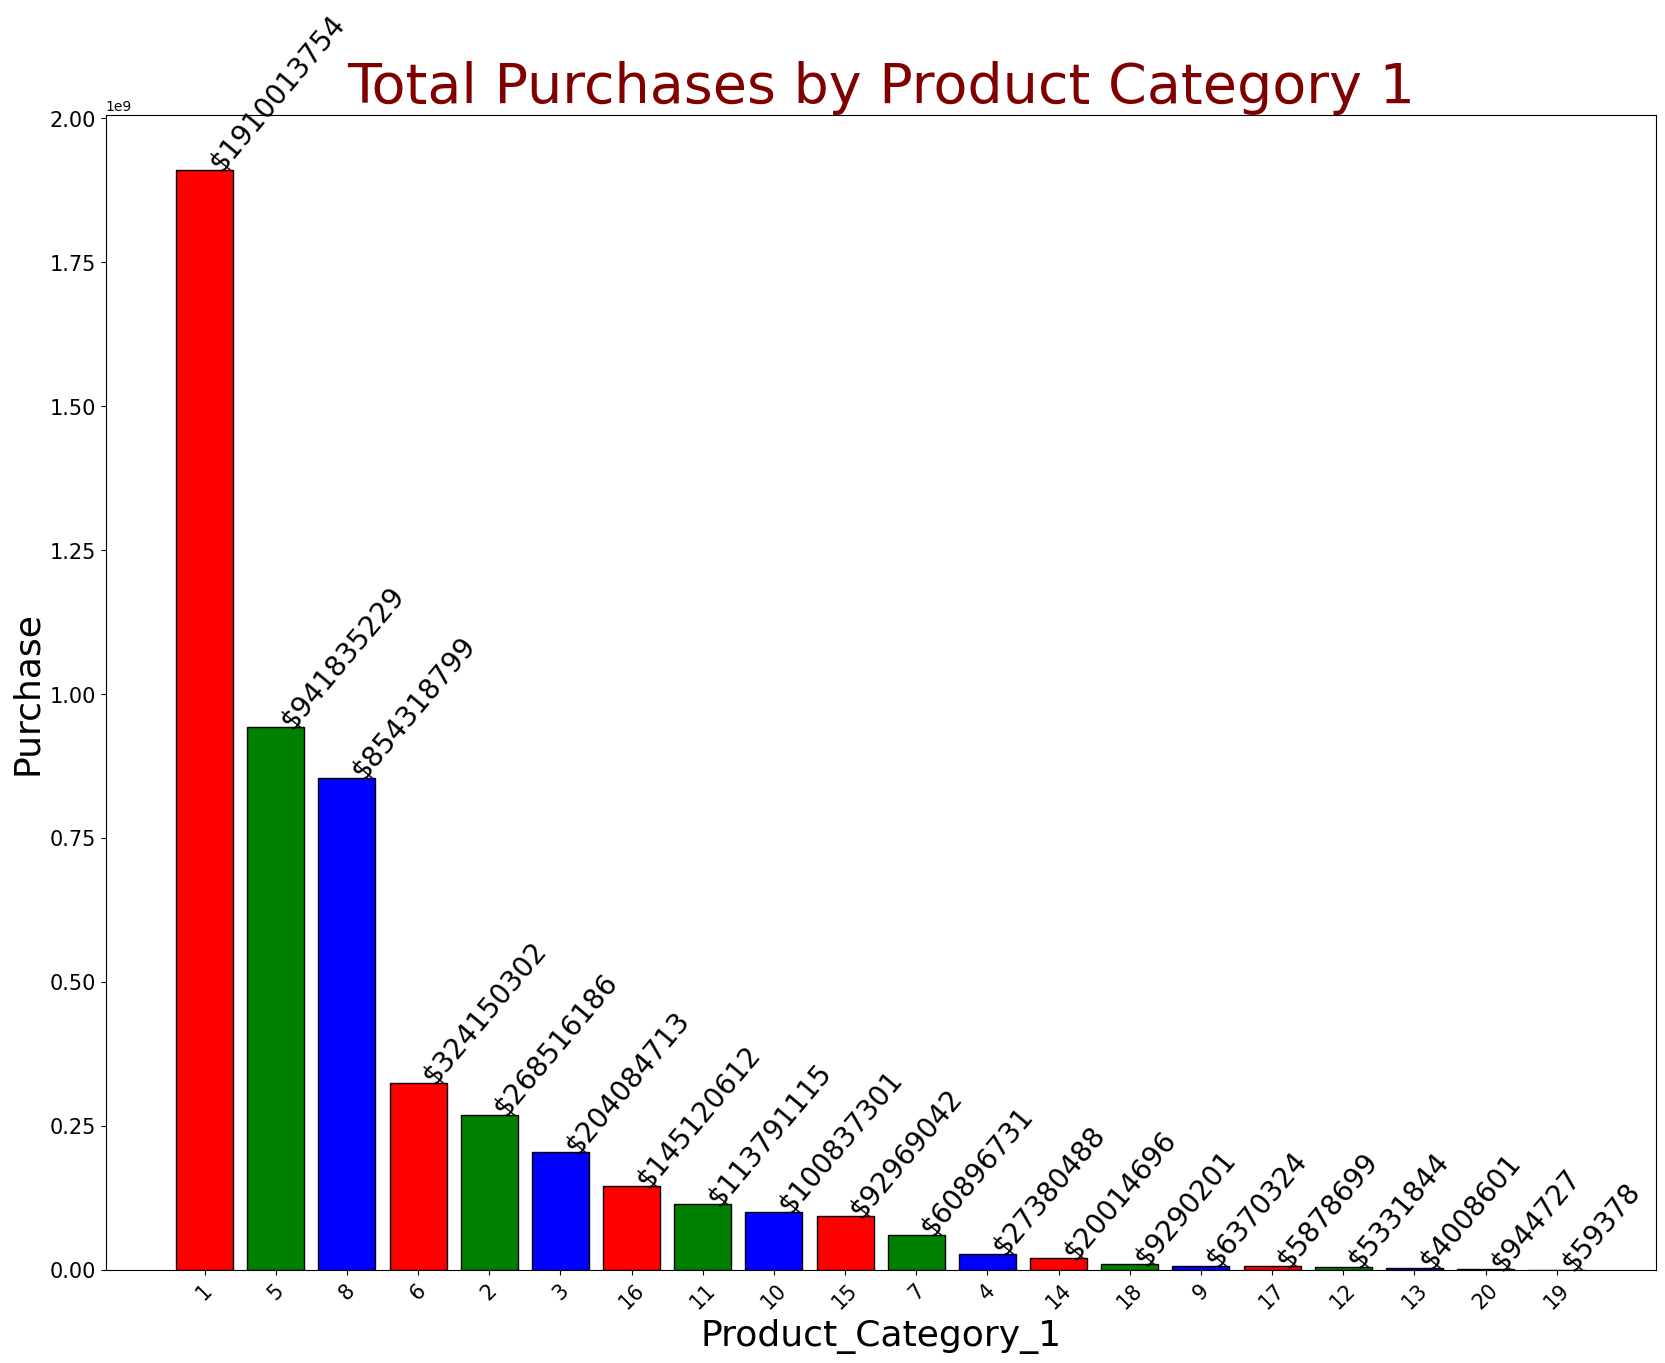

In [152]:
plt.figure(figsize = (20,15)) 
plt.bar(pc1_p_sort["Product_Category_1"], pc1_p_sort["Purchase"],
        color= ('red', "green", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Product_Category_1",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Total Purchases by Product Category 1',color = 'Maroon',fontsize = 40)
for k,v in pc1_p_sort["Purchase"].items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=50, color='k')

In [153]:
# We saw that for our major product category list, Product Category "1" has the majority and by a mile or so, comes next Product
# Categories "5" and "8" with close numbers.

#### For the 2nd Product Category List:

In [154]:
pc2_p = df.groupby('Product_Category_2')["Purchase"].sum()
pc2_p = pd.DataFrame(pc2_p)
pc2_p.reset_index(inplace = True)
pc2_p_sort = pc2_p.sort_values("Purchase",  ascending = False)
pc2_p_sort["Product_Category_2"] = pc2_p_sort["Product_Category_2"].astype(str)
pc2_p_sort.reset_index(inplace = True)

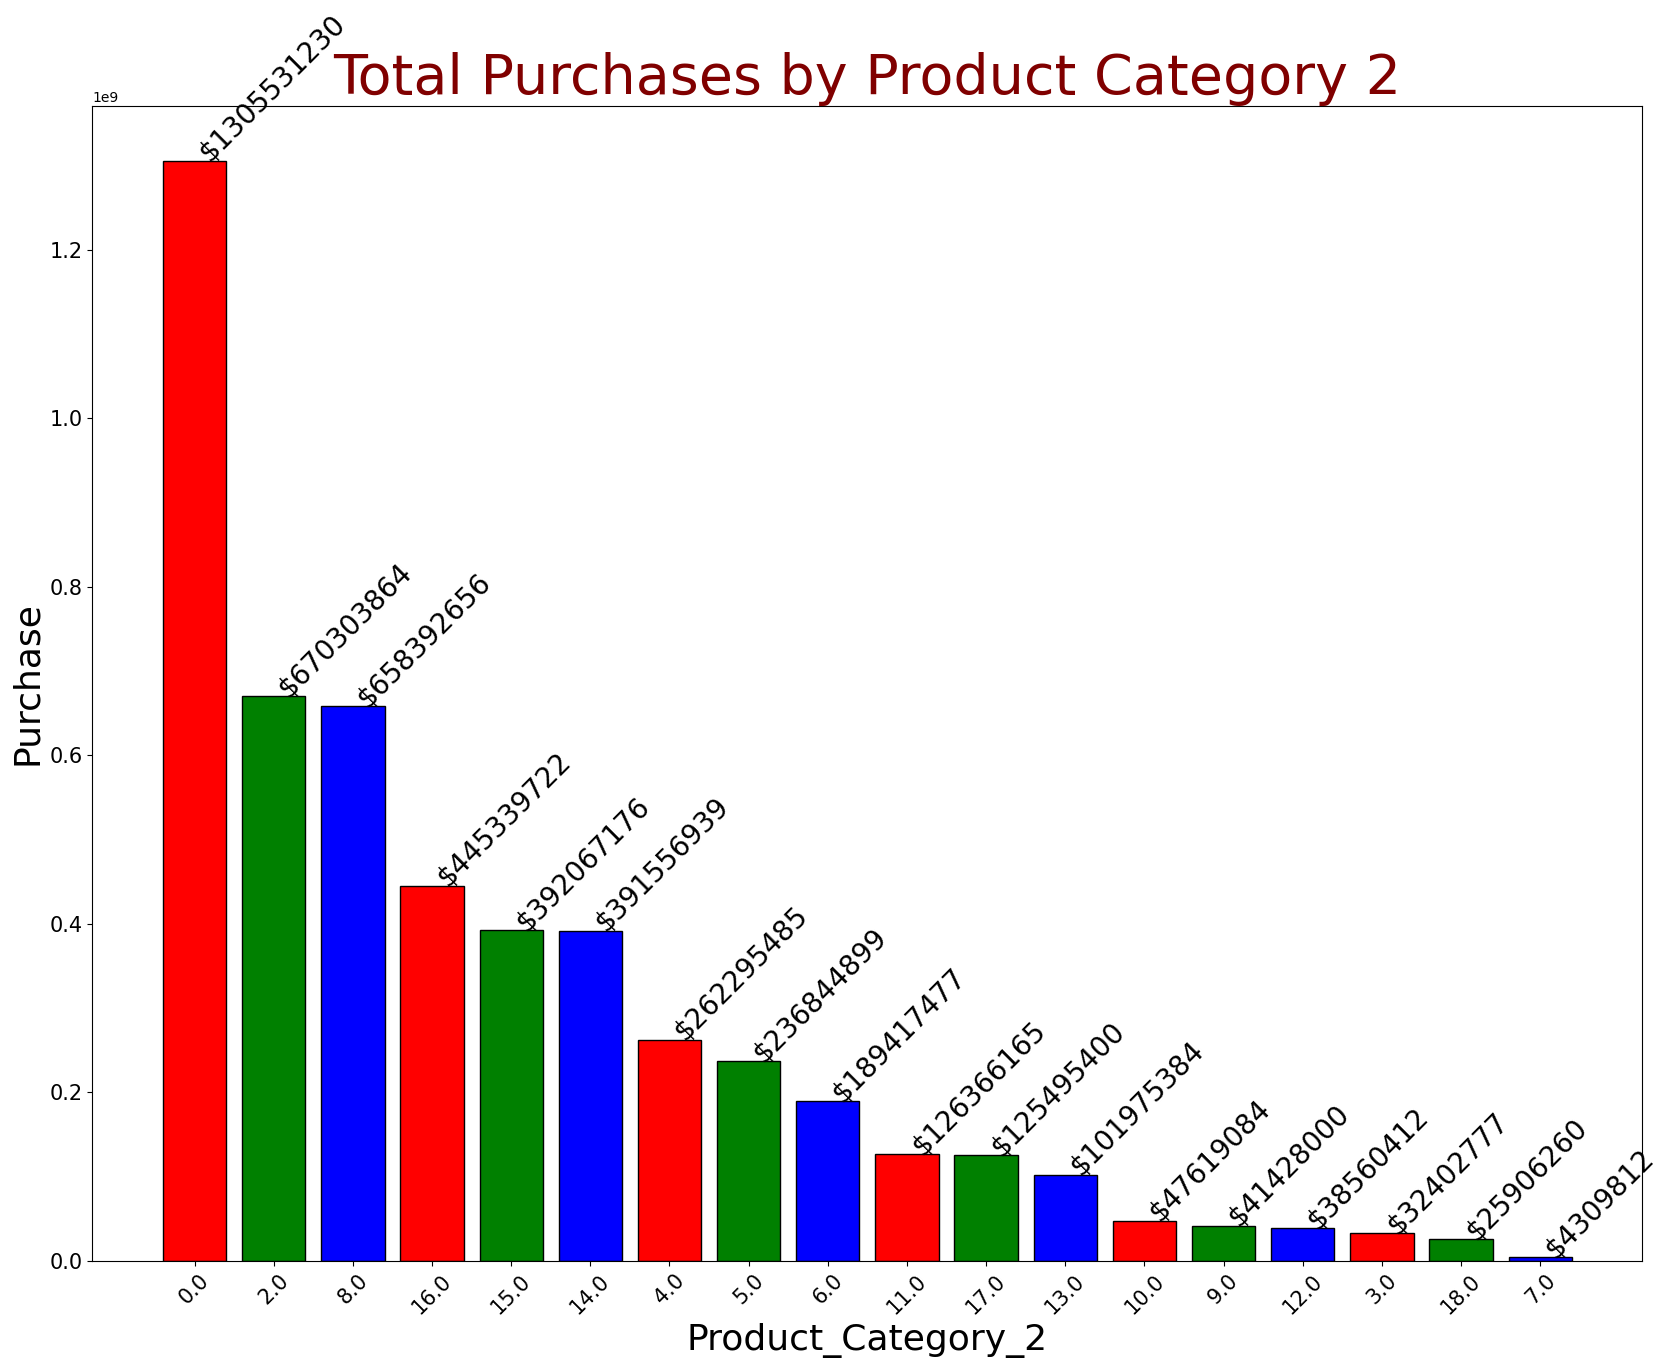

In [155]:
plt.figure(figsize = (20,15)) 
plt.bar(pc2_p_sort["Product_Category_2"], pc2_p_sort["Purchase"],
        color= ('red', "green", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Product_Category_2",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Total Purchases by Product Category 2',color = 'Maroon',fontsize = 40)
for k,v in pc2_p_sort["Purchase"].items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

In [ ]:
# By ignoring the class "0" as it only represents products that didn't belong to the 2nd list of categories, we found that about half the products were left that did belong to Product Category "2"; 
# where the majority and by some margin from the rest goes to both Product Categories "2" and "8" with pretty close numbers

#### For the 3rd Product Category List:

In [156]:
pc3_p = df.groupby('Product_Category_3')["Purchase"].sum()
pc3_p = pd.DataFrame(pc3_p)
pc3_p.reset_index(inplace = True)
pc3_p_sort = pc3_p.sort_values("Purchase",  ascending = False)
pc3_p_sort["Product_Category_3"] = pc3_p_sort["Product_Category_3"].astype(str)
pc3_p_sort.reset_index(inplace = True)

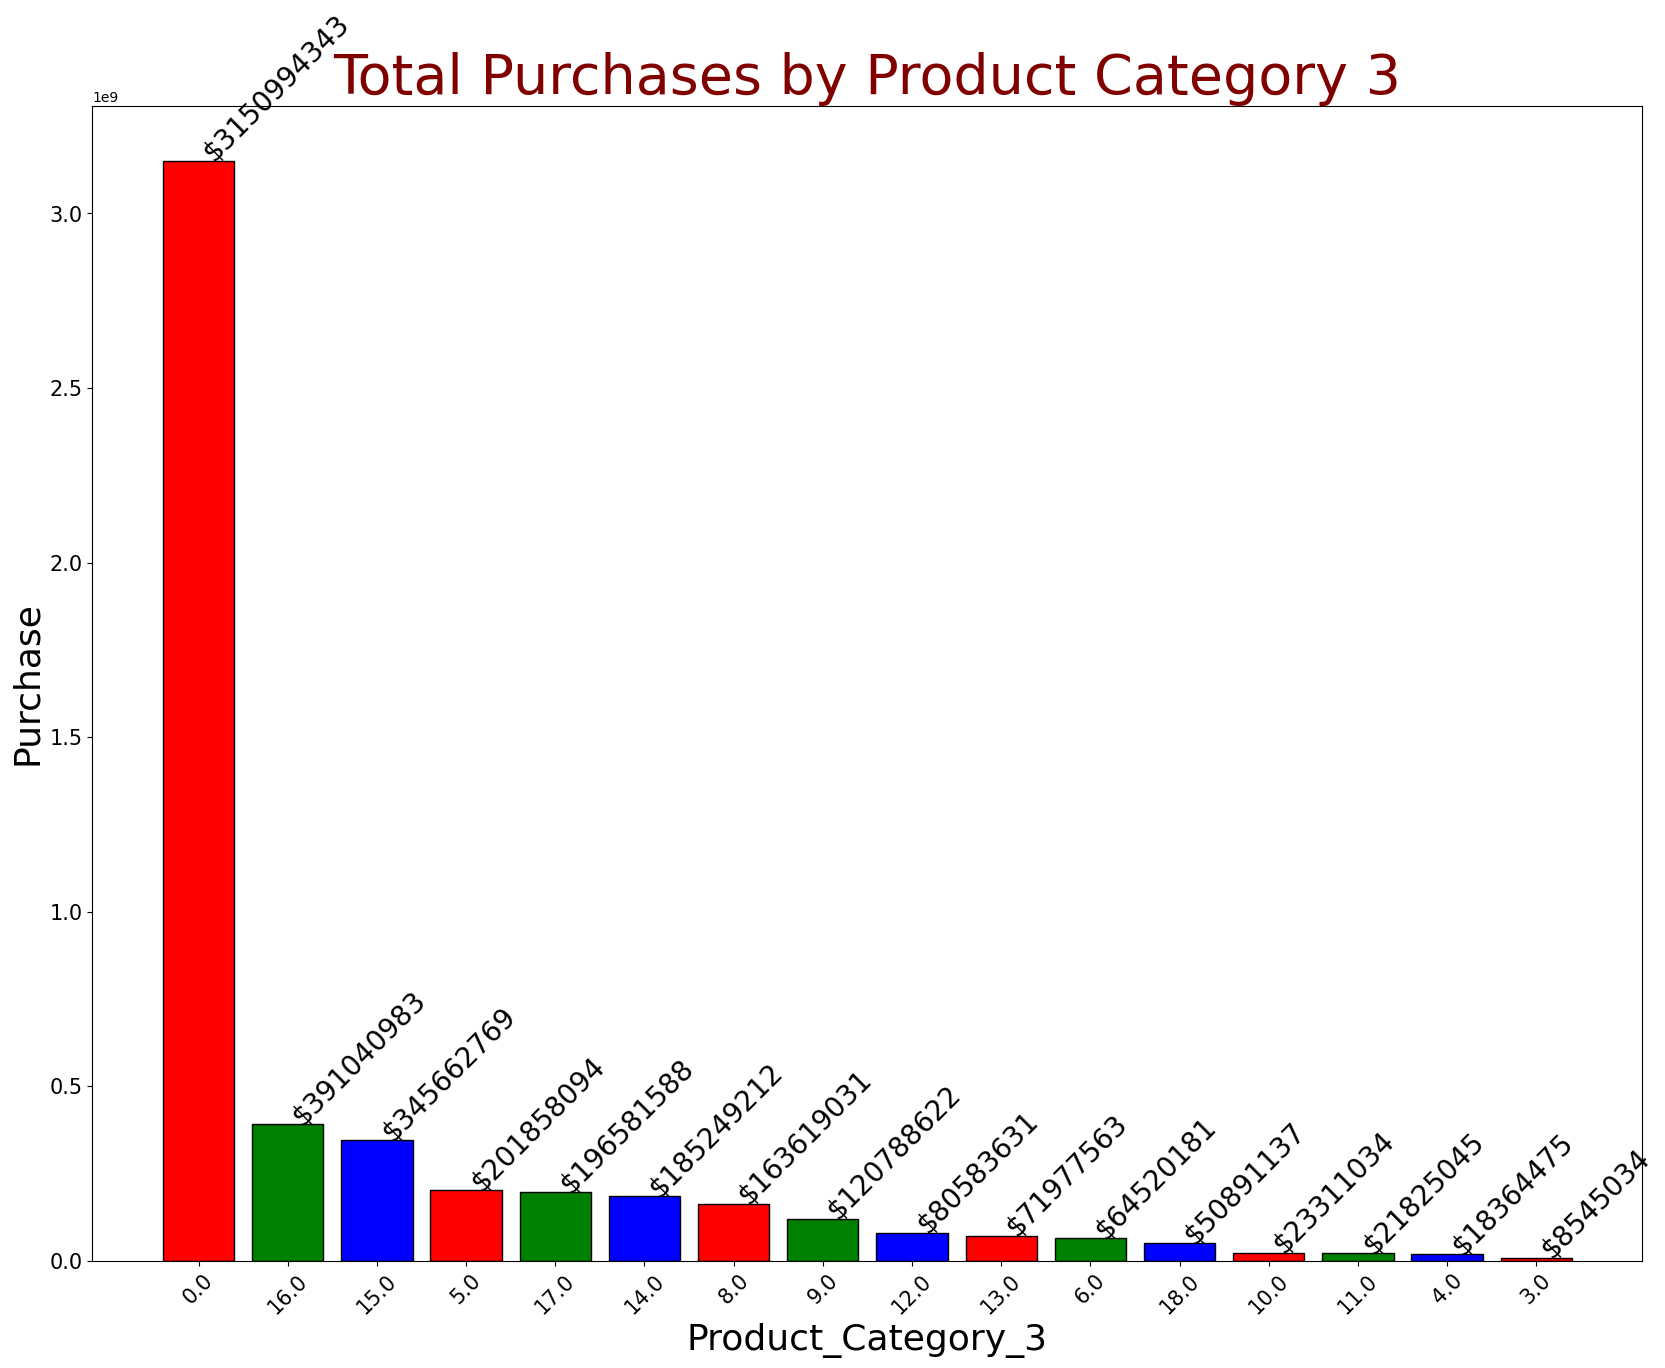

In [157]:
plt.figure(figsize = (20,15)) 
plt.bar(pc3_p_sort["Product_Category_3"], pc3_p_sort["Purchase"],
        color= ('red', "green", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Product_Category_3",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Total Purchases by Product Category 3',color = 'Maroon',fontsize = 40)
for k,v in pc3_p_sort["Purchase"].items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

In [158]:
# By also ignoring the class "0" as it only represents products that didn't belong to the 3rd list of categories, we found that very few products were left that did belong to Product Category "3"; 
# where both Product Categories "16" and "15" had the most purchases

#### Q8: What are the top products?

In [159]:
product_p = df.groupby('Product_ID')["Purchase"].sum()
product_p = pd.DataFrame(product_p)
product_p.reset_index(inplace = True)
top_product = product_p.sort_values("Purchase",  ascending = False)
top_product["Product_ID"] = top_product["Product_ID"].astype(str)
top_product

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887
...,...,...
125,P00012942,1717
3117,P00325342,1656
3389,P00353042,1545
2962,P00309042,726


In [160]:
top_product.reset_index(inplace = True)

In [161]:
top_product

,index,Product_ID,Purchase
0,249,P00025442,27995166
1,1016,P00110742,26722309
2,2443,P00255842,25168963
3,582,P00059442,24338343
4,1745,P00184942,24334887
...,...,...,...
3626,125,P00012942,1717
3627,3117,P00325342,1656
3628,3389,P00353042,1545
3629,2962,P00309042,726


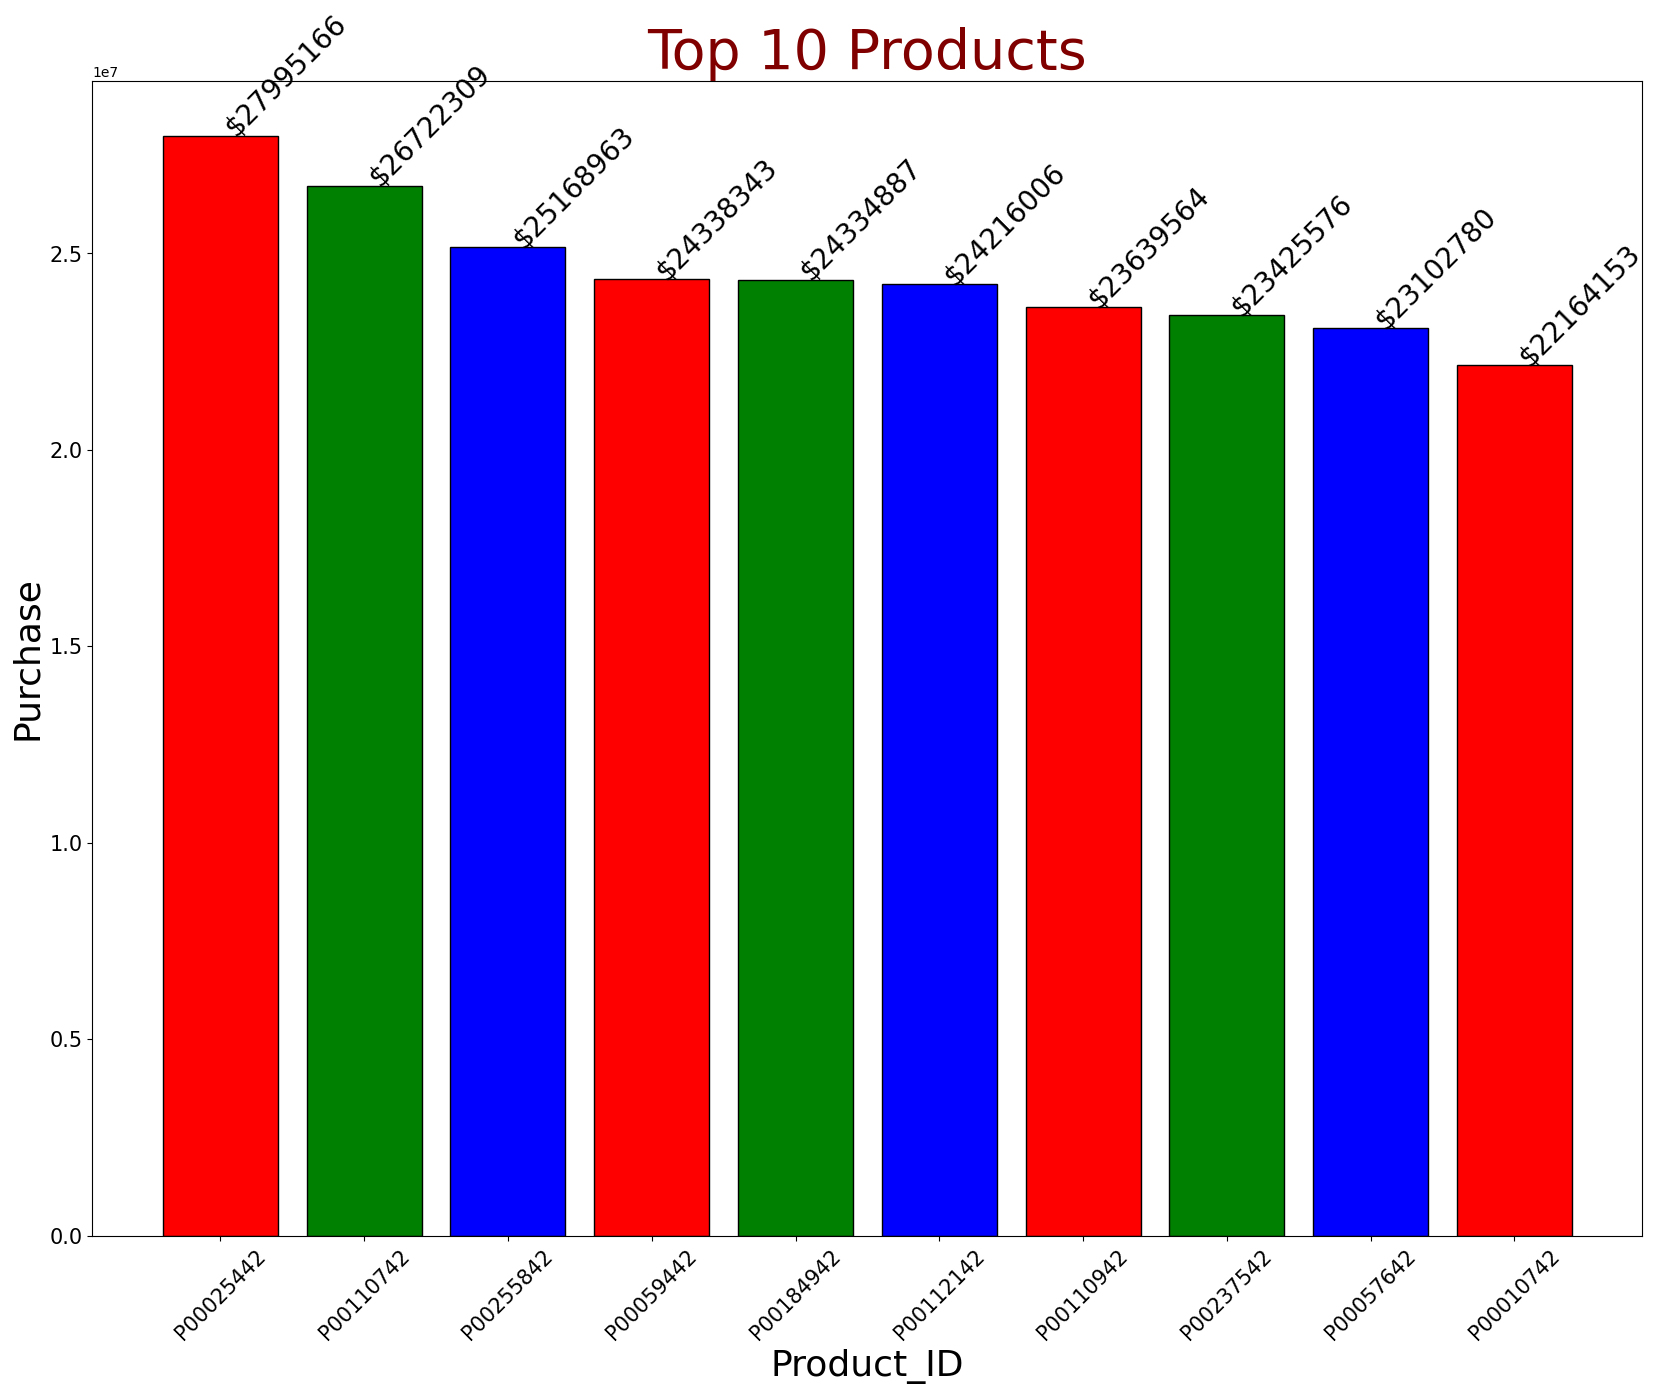

In [162]:
plt.figure(figsize = (20,15)) 
plt.bar(top_product["Product_ID"].head(10), top_product["Purchase"].head(10),
        color= ('red', "green", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Product_ID",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Top 10 Products',color = 'Maroon',fontsize = 40)
for k,v in top_product["Purchase"].head(10).items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

#### Q9: Who are the top customers?

In [163]:
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [164]:
Cust_p = df.groupby('User_ID')["Purchase"].sum()
Cust_p = pd.DataFrame(Cust_p)
Cust_p.reset_index(inplace = True)
top_cust = Cust_p.sort_values("Purchase",  ascending = False)
top_cust["User_ID"] = top_cust["User_ID"].astype(str)
top_cust.reset_index(inplace = True)

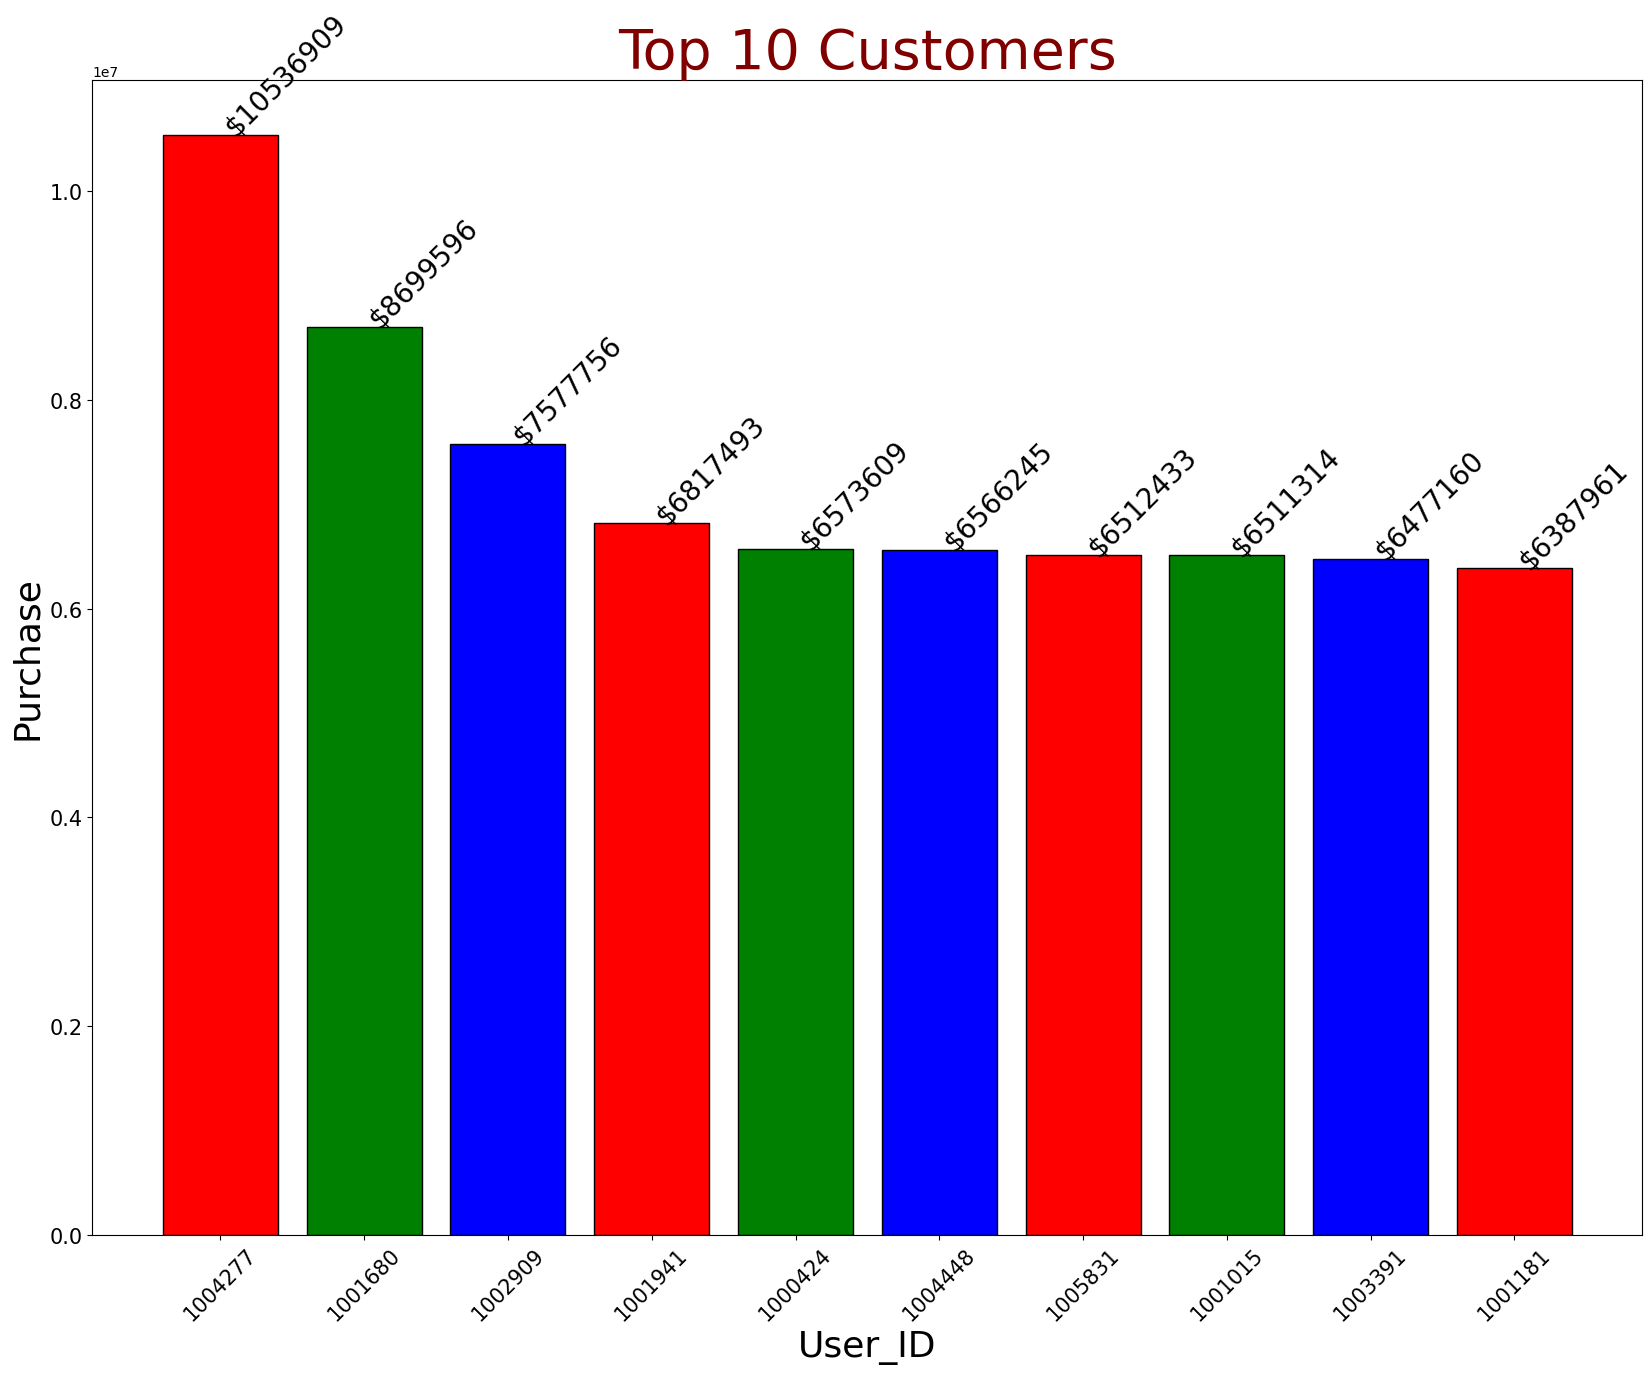

In [165]:
plt.figure(figsize = (20,15)) 
plt.bar(top_cust["User_ID"].head(10), top_cust["Purchase"].head(10),
        color= ('red', "green", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("User_ID",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Top 10 Customers',color = 'Maroon',fontsize = 40)
for k,v in top_cust["Purchase"].head(10).items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

In [ ]:
# Let's check the top 3 customers for more insights:

In [166]:
display(df[df["User_ID"] == 1004277].head(1))
display(df[df["User_ID"] == 1001680].head(1))
display(df[df["User_ID"] == 1002909].head(1))

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27930,1004277,P00034742,M,36-45,16,A,0,0,5,14.0,17.0,8763


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
11055,1001680,P00036742,M,26-35,20,A,3,1,1,16.0,0.0,15670


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
18468,1002909,P00297742,M,26-35,7,A,1,0,8,17.0,0.0,8112


## Modeling and Results

### Featuring Encoding and Scaling

In [167]:
from sklearn.preprocessing import OrdinalEncoder

In [168]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [169]:
# Let's apply ordinal encoding for ordinal data:
ord_enc = OrdinalEncoder()
df.loc[: , ['User_ID', 'Product_ID', 'Age']] = ord_enc.fit_transform(df[['User_ID', 'Product_ID', 'Age']])

In [170]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.0,672.0,F,0.0,10,A,2,0,3,0.0,0.0,8370
1,0.0,2376.0,F,0.0,10,A,2,0,1,6.0,14.0,15200
2,0.0,852.0,F,0.0,10,A,2,0,12,0.0,0.0,1422
3,0.0,828.0,F,0.0,10,A,2,0,12,14.0,0.0,1057
4,1.0,2734.0,M,6.0,16,C,4+,0,8,0.0,0.0,7969


In [171]:
# Let's apply one hot encoding for nominal data:
df = pd.get_dummies(df, columns=['Gender', 'City_Category', 'Stay_In_Current_City_Years'])


In [172]:
df.head(5)

,User_ID,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0.0,672.0,0.0,10,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,1,0,0
1,0.0,2376.0,0.0,10,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,1,0,0
2,0.0,852.0,0.0,10,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,1,0,0
3,0.0,828.0,0.0,10,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,1,0,0
4,1.0,2734.0,6.0,16,0,8,0.0,0.0,7969,0,1,0,0,1,0,0,0,0,1


In [175]:
df_purchases = df["Purchase"]
df.drop(columns="Purchase", inplace=True)


In [176]:
df = pd.concat([df, df_purchases], axis = 1)

In [177]:
df.head(5)

,User_ID,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
0,0.0,672.0,0.0,10,0,3,0.0,0.0,1,0,1,0,0,0,0,1,0,0,8370
1,0.0,2376.0,0.0,10,0,1,6.0,14.0,1,0,1,0,0,0,0,1,0,0,15200
2,0.0,852.0,0.0,10,0,12,0.0,0.0,1,0,1,0,0,0,0,1,0,0,1422
3,0.0,828.0,0.0,10,0,12,14.0,0.0,1,0,1,0,0,0,0,1,0,0,1057
4,1.0,2734.0,6.0,16,0,8,0.0,0.0,0,1,0,0,1,0,0,0,0,1,7969


In [ ]:
# Let's drop with the outliers

In [178]:
from scipy.stats import iqr

In [179]:
all_outliers_idx = []

for feat in df[["Product_Category_1", "Purchase"]]:
    
    q1 = np.percentile(df[feat], 25)
   
    q3 = np.percentile(df[feat], 75)
   
    iqr_value = iqr(df[feat])
    step = 1.5 * iqr_value
    
    print (f"The outliers for the {feat} feature are:" )
    feat_outliers = df[(df[feat] < q1 - step) | (df[feat] > q3 + step)]
    display(feat_outliers)
    
    for idx in list(feat_outliers.index):
        all_outliers_idx.append(idx)

The outliers for the Product_Category_1 feature are:


,User_ID,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
545915,0.0,3568.0,0.0,10,0,20,0.0,0.0,1,0,1,0,0,0,0,1,0,0,612
545916,1.0,3567.0,6.0,16,0,20,0.0,0.0,0,1,0,0,1,0,0,0,0,1,119
545917,3.0,3568.0,4.0,7,1,20,0.0,0.0,0,1,0,1,0,0,0,1,0,0,481
545918,5.0,3568.0,5.0,9,0,20,0.0,0.0,1,0,1,0,0,0,1,0,0,0,480
545919,6.0,3567.0,3.0,1,1,20,0.0,0.0,0,1,0,1,0,0,1,0,0,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883.0,3567.0,5.0,13,1,20,0.0,0.0,0,1,0,1,0,0,1,0,0,0,368
550064,5885.0,3568.0,2.0,1,0,20,0.0,0.0,1,0,0,0,1,0,0,0,1,0,371
550065,5886.0,3568.0,2.0,15,1,20,0.0,0.0,1,0,0,1,0,0,0,0,0,1,137
550066,5888.0,3568.0,6.0,1,0,20,0.0,0.0,1,0,0,0,1,0,0,1,0,0,365


The outliers for the Purchase feature are:


,User_ID,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
343,55.0,1085.0,2.0,2,0,10,16.0,0.0,0,1,0,1,0,0,0,0,1,0,23603
375,59.0,1102.0,3.0,3,0,10,13.0,0.0,1,0,1,0,0,0,1,0,0,0,23792
652,122.0,844.0,1.0,9,0,10,14.0,16.0,0,1,0,1,0,0,1,0,0,0,23233
736,135.0,1498.0,2.0,20,0,10,15.0,16.0,1,0,0,0,1,0,0,1,0,0,23595
1041,171.0,519.0,2.0,2,0,10,15.0,0.0,1,0,0,1,0,0,1,0,0,0,23341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544488,5667.0,1070.0,2.0,20,0,10,13.0,16.0,0,1,0,1,0,0,1,0,0,0,23753
544704,5698.0,827.0,1.0,4,0,10,13.0,0.0,1,0,0,1,0,0,0,1,0,0,23724
544743,5703.0,1918.0,2.0,1,1,10,16.0,0.0,1,0,1,0,0,1,0,0,0,0,23529
545663,5852.0,1070.0,5.0,0,1,10,13.0,16.0,0,1,0,0,1,0,1,0,0,0,23663


In [180]:
# Remove the outliers, if any were specified
clean_df = df.drop(df.index[all_outliers_idx]).reset_index(drop = True)

<Axes: xlabel='Product_Category_1'>

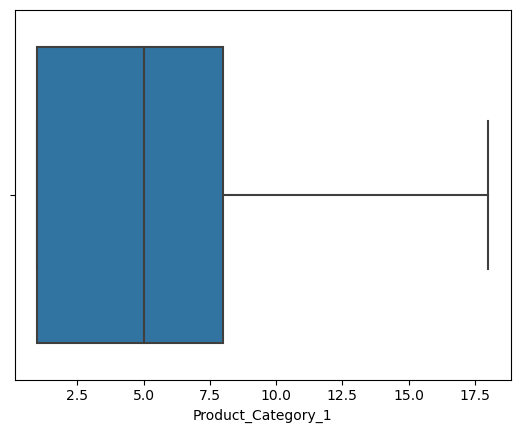

In [181]:
sns.boxplot(x = clean_df["Product_Category_1"])

<Axes: xlabel='Purchase'>

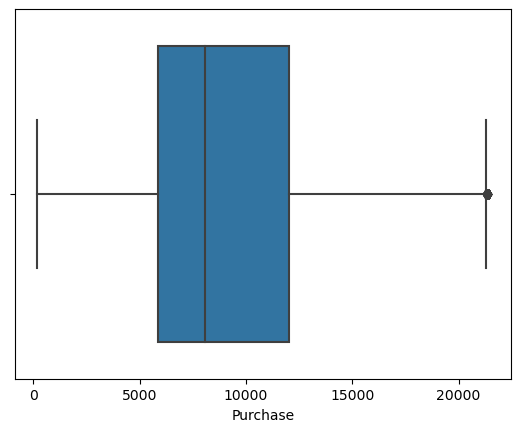

In [182]:
sns.boxplot(x = clean_df["Purchase"])

In [183]:
# Now, we can apply any scaler to the whole dataset, but because we don't need to scale our target in our case here,
# we will scale only the features, so we can do this after droping the target (while we are getting ready for the splitting stage)

In [184]:
df_scaled = clean_df.copy()

In [185]:
x = df_scaled.drop(columns='Purchase')
y = clean_df['Purchase']

In [186]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
for i in x:
    x[i] = minmax.fit_transform(x[[i]])
x

,User_ID,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0.00000,0.185124,0.000000,0.5,0.0,0.117647,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.00000,0.654545,0.000000,0.5,0.0,0.000000,0.333333,0.777778,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.00000,0.234711,0.000000,0.5,0.0,0.647059,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.00000,0.228099,0.000000,0.5,0.0,0.647059,0.777778,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.00017,0.753168,1.000000,0.8,0.0,0.411765,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543233,1.00000,0.479063,0.333333,0.3,0.0,0.411765,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
543234,1.00000,0.503306,0.333333,0.3,0.0,0.235294,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
543235,1.00000,0.080716,0.333333,0.3,0.0,0.411765,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
543236,1.00000,0.267218,0.333333,0.3,0.0,0.235294,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Features Selection

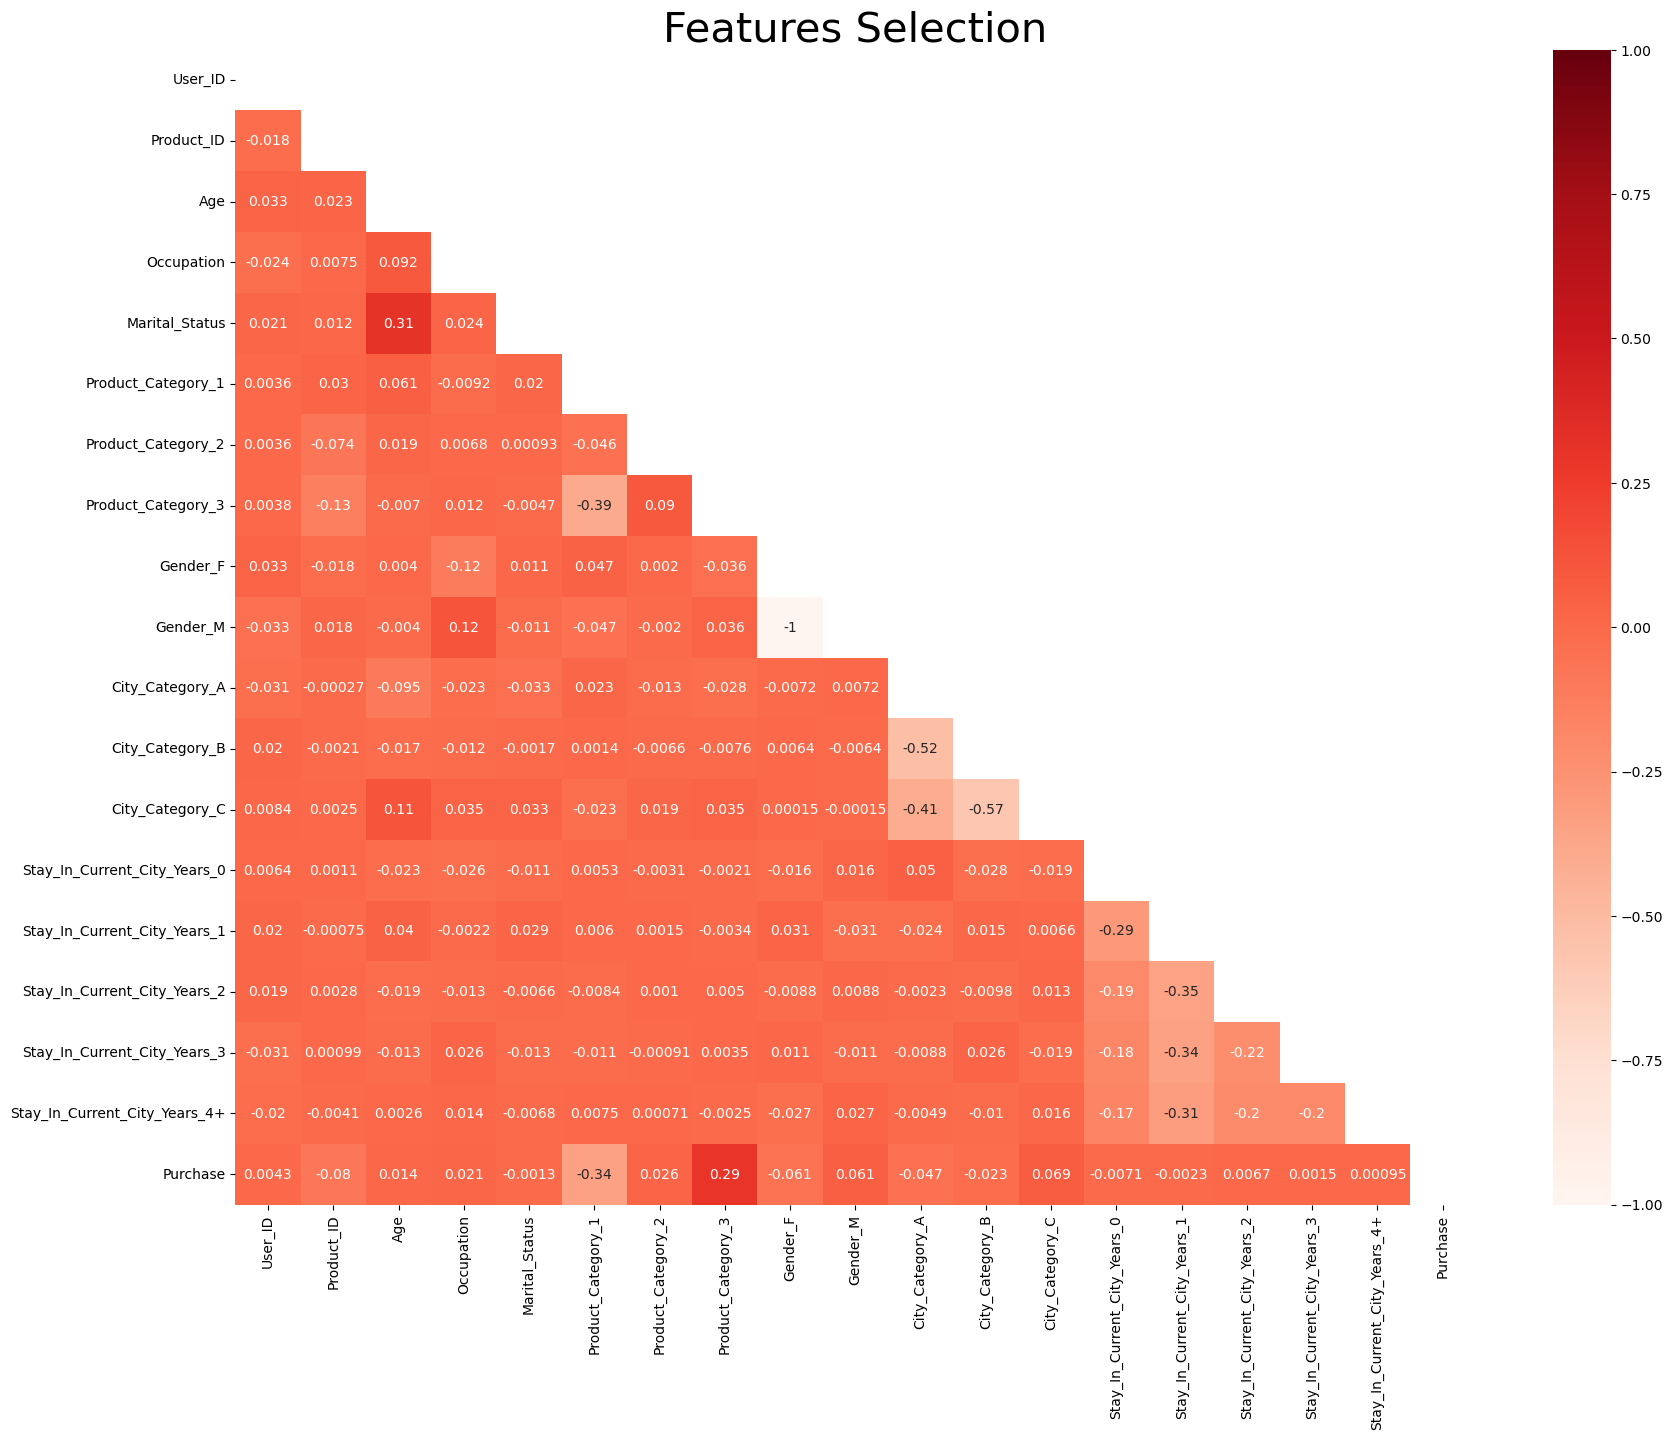

In [187]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df_scaled.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Features Selection', color = 'black', fontsize = 30)
plt.show()

In [188]:
# Checking for Correlated Features (Autocorrelation):

In [189]:
df.keys()

Index(['User_ID', 'Product_ID', 'Age', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Purchase'],
      dtype='object')

In [190]:
x.drop(columns=["Gender_F", "City_Category_B", "Stay_In_Current_City_Years_4+", 
                "Product_Category_3"], inplace = True)

### Data Splitting

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [192]:
from pycaret.datasets import get_data
from pycaret.regression import *

In [193]:
reg_setup = setup(x_train, target=y_train, session_id=123)

,Description,Value
0,Session id,123
1,Target,Purchase
2,Target type,Regression
3,Original data shape,"(380266, 15)"
4,Transformed data shape,"(380266, 15)"
5,Transformed train set shape,"(266186, 15)"
6,Transformed test set shape,"(114080, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [195]:
compare_models()

[]

In [196]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr.score(x_train, y_train)

0.9560185743909326

In [197]:
rfr.score(x_test, y_test)

0.6895729507759885

In [198]:
y_pred = rfr.predict(x_test)

In [199]:
from sklearn.metrics import r2_score

In [200]:
r2_score(y_test, y_pred)

0.6895729507759885

In [201]:
pred_df = pd.DataFrame({" Y Prediction": y_pred, "Y Actual": y_test}).reset_index(drop=True)
pred_df.head(10)

,Y Prediction,Y Actual
0,6837.65,8871
1,1567.81,2156
2,6376.08,6461
3,5828.90,1859
4,10571.04,19207
5,7906.77,9898
6,6691.27,7964
7,17694.97,19614
8,10740.68,15189
9,5090.62,1832


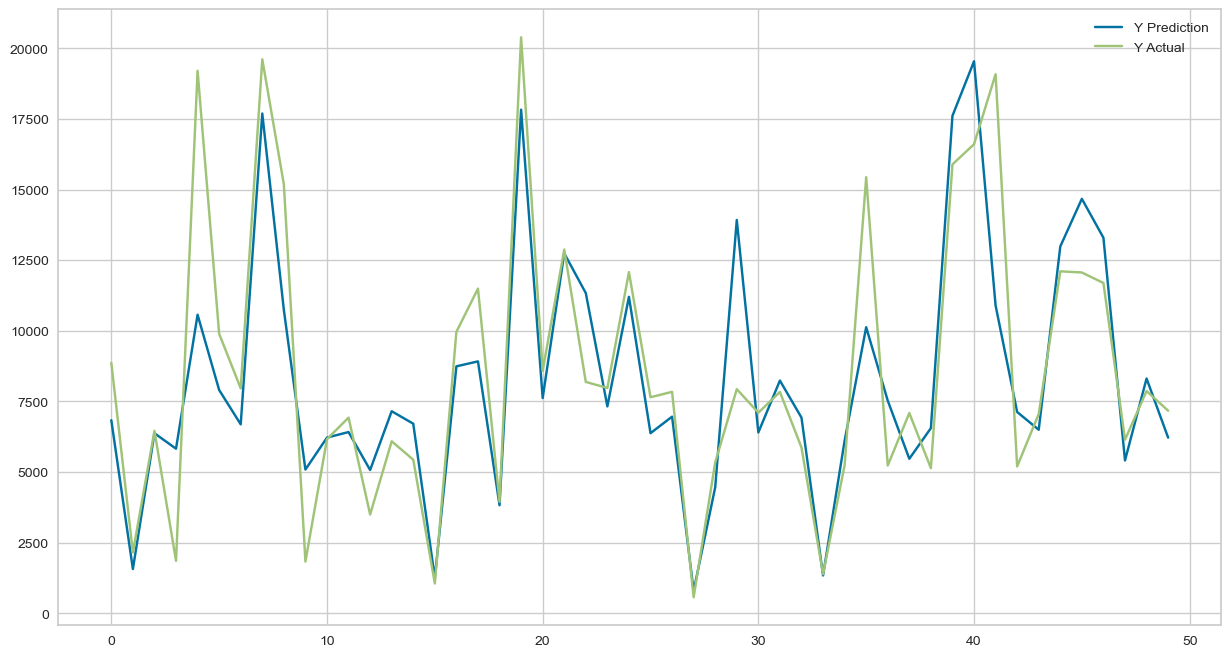

In [202]:
plt.figure(figsize = (15,8))
plt.plot(pred_df[:50])
plt.legend(["Y Prediction", "Y Actual"])

In [203]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=123)
gbr.fit(x_train.values, y_train.values)
print(gbr.score(x_train, y_train))
print(gbr.score(x_test, y_test))

0.6453173972543311
0.6472757923534851


In [204]:
y_pred_gbr = gbr.predict(x_test.values)
r2_score(y_test.values, y_pred_gbr)


0.6472757923534851

In [205]:
pred_df2 = pd.DataFrame({" Y Prediction": y_pred_gbr, "Y Actual": y_test.values})
pred_df2.head(10)

,Y Prediction,Y Actual
0,6340.900725,8871
1,2620.617907,2156
2,10649.199003,6461
3,6285.343269,1859
4,13196.135065,19207
5,8474.691015,9898
6,7380.818090,7964
7,15602.520937,19614
8,12608.256849,15189
9,6234.051746,1832


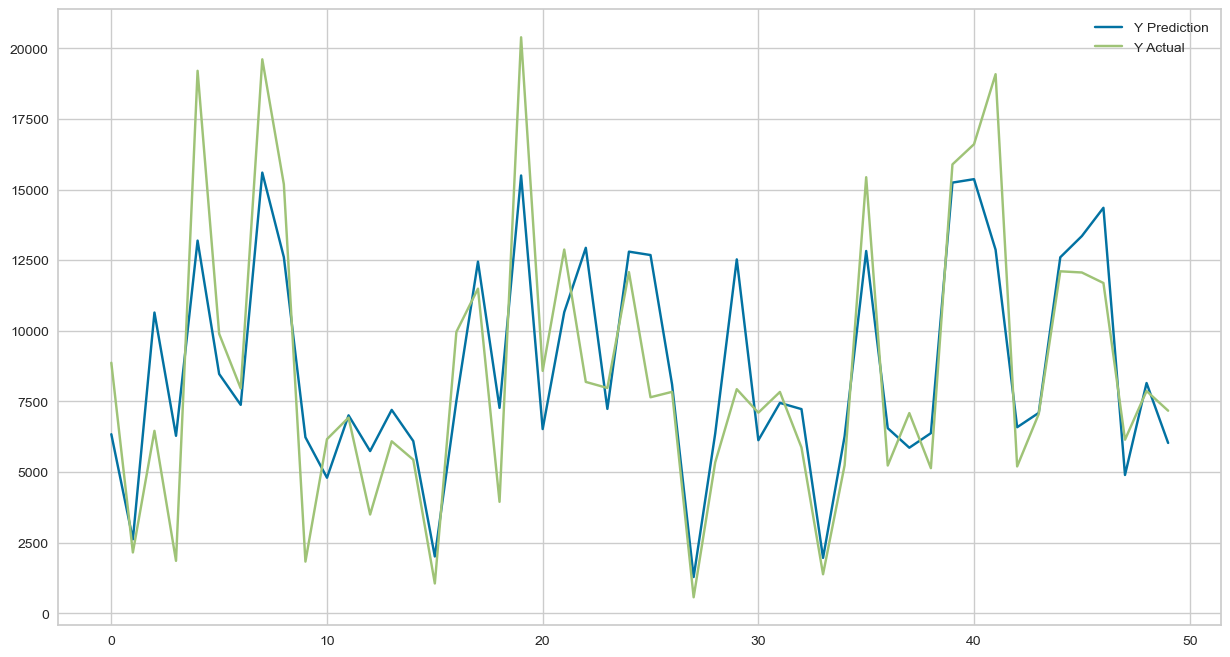

In [206]:
plt.figure(figsize = (15,8))
plt.plot(pred_df2[:50])
plt.legend(["Y Prediction", "Y Actual"])

In [208]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 

In [209]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [210]:
print(xgbr.score(x_train, y_train))
print(xgbr.score(x_test, y_test))

0.7166960355777986
0.7089496405243465


In [212]:
y_pred_xgbr = xgbr.predict(x_test.values)
r2_score(y_test.values, y_pred_xgbr)

0.7089496405243465

In [213]:
pred_df3 = pd.DataFrame({" Y Prediction": y_pred_xgbr, "Y Actual": y_test.values})
pred_df3.head(10)

,Y Prediction,Y Actual
0,7650.211914,8871
1,2346.101318,2156
2,8035.774902,6461
3,6212.806641,1859
4,12183.930664,19207
5,8746.343750,9898
6,7228.762695,7964
7,17496.328125,19614
8,9630.939453,15189
9,6281.774414,1832


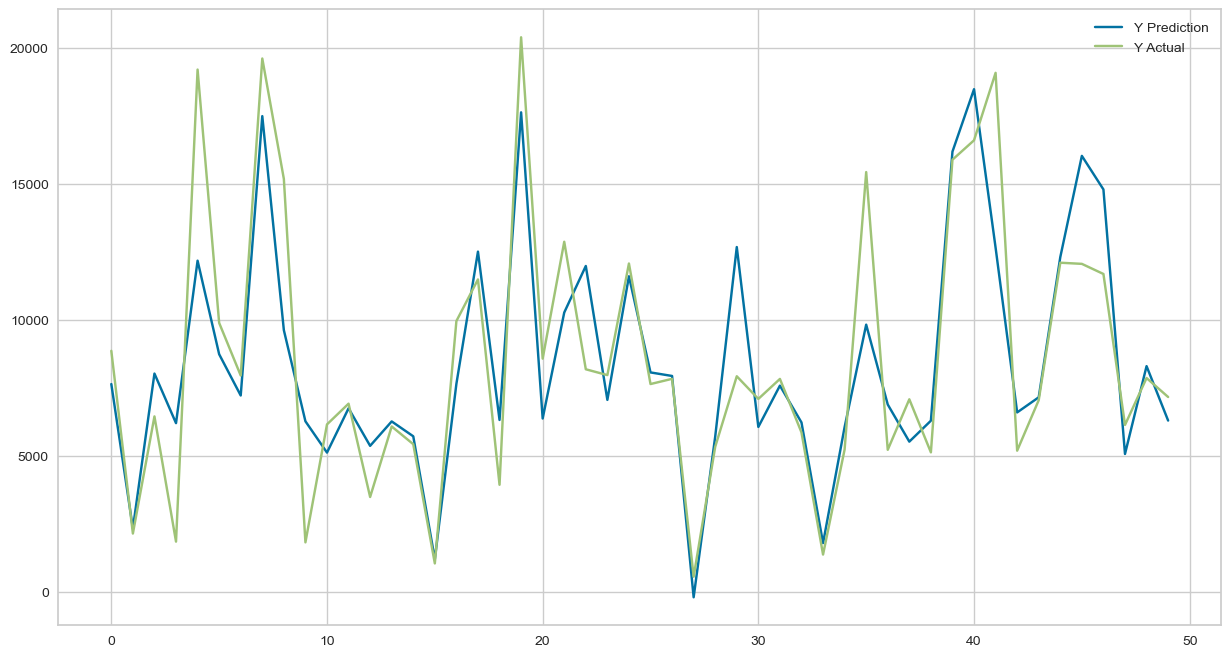

In [214]:
plt.figure(figsize = (15,8))
plt.plot(pred_df3[:50])
plt.legend(["Y Prediction", "Y Actual"])

### Conclusion
* We have about 3631 different products
* We saw that the majority of the purchases have been done by the males.
* We saw that the majority of the purchases were done by young adults (26-35).
* We also noticed that some occupations had higher purchases.
* We also found single customers tend to but more than married ones.
* We found that there are certain categories that customers tend to buy more.
* We got the following insights from the top 3 customers:

* They are all males.
* 2 of them are from the young adults category (26-35), and the third is from the older adults category.
* They all come from city category A.
* 2 of them are single.
* 2 of them didn't stay more than 1 year in the current city.
* We found that product categories had the most impact on the purchases.

* Eventually we managed to build the required model with about 71% R2 Score.

#  THANK YOU